Import libraries

Taken from website:-
https://ourworldindata.org/coronavirus-source-data

In [628]:
import pandas as pd
import numpy as np

Read files

In [629]:
# load datasets
train = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
train

iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.511
1          AFG      Asia  ...           64.83                   0.511
2          AFG      Asia  ...           64.83                   0.511
3          AFG      Asia  ...           64.83                   0.511
4          AFG      Asia  ...           64.83                   0.511
...        ...       ...  ...             ...                     ...
83857      ZWE    Africa  ...           61.49                   0.571
83858      ZWE    Africa  ...           61.49                   0.571
83859      ZWE    Africa  ...           61.49                   0.571
83860      ZWE    Africa  ...           61.49                   0.571
83861      ZWE    Africa  ...           61.49                   0.571

[83862 rows x 59 columns]

In [630]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [631]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83862 entries, 0 to 83861
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               83862 non-null  object 
 1   continent                              79805 non-null  object 
 2   location                               83862 non-null  object 
 3   date                                   83862 non-null  object 
 4   total_cases                            81878 non-null  float64
 5   new_cases                              81876 non-null  float64
 6   new_cases_smoothed                     80875 non-null  float64
 7   total_deaths                           72262 non-null  float64
 8   new_deaths                             72420 non-null  float64
 9   new_deaths_smoothed                    80875 non-null  float64
 10  total_cases_per_million                81435 non-null  float64
 11  ne

Convert date to number

In [632]:
import datetime 

date = train.date

train['date'] = pd.to_datetime(train['date'], errors='coerce')
train['date_num'] = train['date'].dt.strftime('%d%m%Y')
train

iso_code continent  ... human_development_index  date_num
0          AFG      Asia  ...                   0.511  24022020
1          AFG      Asia  ...                   0.511  25022020
2          AFG      Asia  ...                   0.511  26022020
3          AFG      Asia  ...                   0.511  27022020
4          AFG      Asia  ...                   0.511  28022020
...        ...       ...  ...                     ...       ...
83857      ZWE    Africa  ...                   0.571  20042021
83858      ZWE    Africa  ...                   0.571  21042021
83859      ZWE    Africa  ...                   0.571  22042021
83860      ZWE    Africa  ...                   0.571  23042021
83861      ZWE    Africa  ...                   0.571  24042021

[83862 rows x 60 columns]

Country

In [633]:
country = train['location'].to_list()

# using naive method to remove duplicated from list  
list_country = [] 
for i in country: 
    if i not in list_country: 
        list_country.append(i) 

list_country

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',
 'Faeroe Islands',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 'Gabon'

In [634]:
print(len(list_country))

219


Get latest date

In [635]:
from datetime import date 
from datetime import timedelta

In [636]:
today = date.today() 
print("Today is: ", today) 

Today is:  2021-04-25


In [637]:
yesterday = today - timedelta(days = 1) 
print("Yesterday was: ", yesterday)

Yesterday was:  2021-04-24


In [638]:
last_date = train.date.max()
last_date

Timestamp('2021-04-24 00:00:00')

In [639]:
print(type(last_date))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [640]:
yesterday = pd.Timestamp(yesterday)

In [641]:
print(type(yesterday))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [642]:
if last_date == yesterday: 
    last_date = yesterday
elif last_date > yesterday: 
    last_date = yesterday 
else: 
    last_date = last_date
last_date


Timestamp('2021-04-24 00:00:00')

In [643]:
last_date = train[train.date == last_date]
last_date

iso_code continent  ... human_development_index  date_num
425         AFG      Asia  ...                   0.511  24042021
862    OWID_AFR       NaN  ...                     NaN  24042021
1287        ALB    Europe  ...                   0.795  24042021
1712        DZA    Africa  ...                   0.748  24042021
2131        AND    Europe  ...                   0.868  24042021
...         ...       ...  ...                     ...       ...
82218       VNM      Asia  ...                   0.704  24042021
82677  OWID_WRL       NaN  ...                   0.737  24042021
83057       YEM      Asia  ...                   0.470  24042021
83460       ZMB    Africa  ...                   0.584  24042021
83861       ZWE    Africa  ...                   0.571  24042021

[205 rows x 60 columns]

Graphical representation

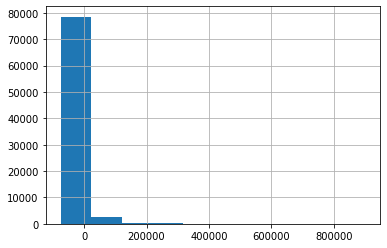

In [644]:
from matplotlib import pyplot as plt

train.new_cases.hist()

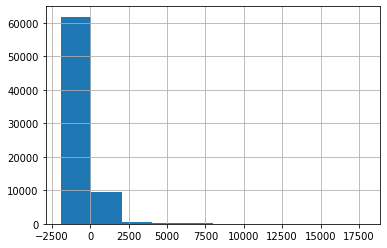

In [645]:
train.new_deaths.hist()

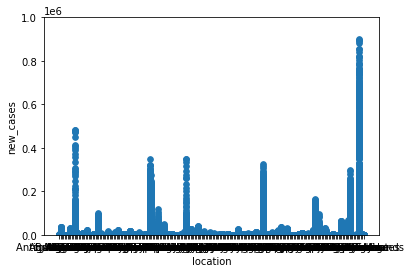

In [646]:
var = 'location'
data = pd.concat([train['new_cases'], train[var]], axis=1)
data.plot.scatter(x=var, y='new_cases', ylim=(0,1000000), s=32);

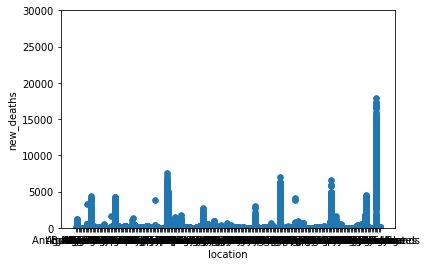

In [647]:
var = 'location'
data = pd.concat([train['new_deaths'], train[var]], axis=1)
data.plot.scatter(x=var, y='new_deaths', ylim=(0,30000), s=32);

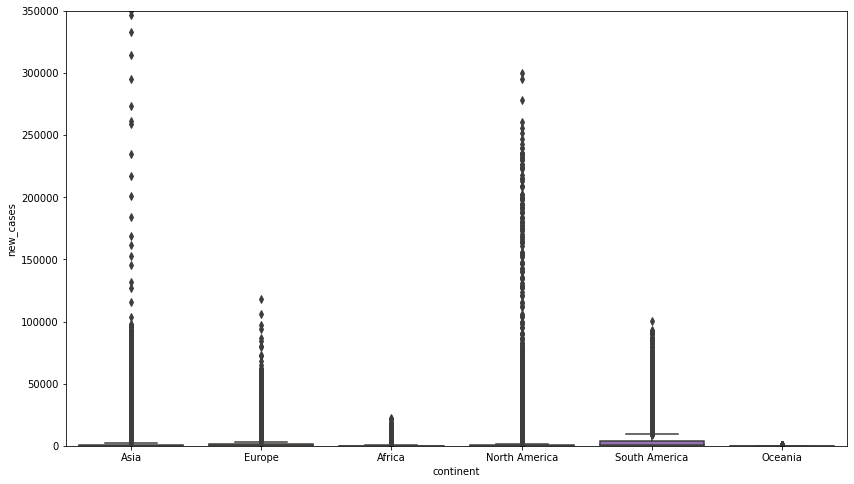

In [648]:
import seaborn as sns

var = 'continent'
data = pd.concat([train['new_cases'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_cases", data=data)
fig.axis(ymin=0, ymax=350000);

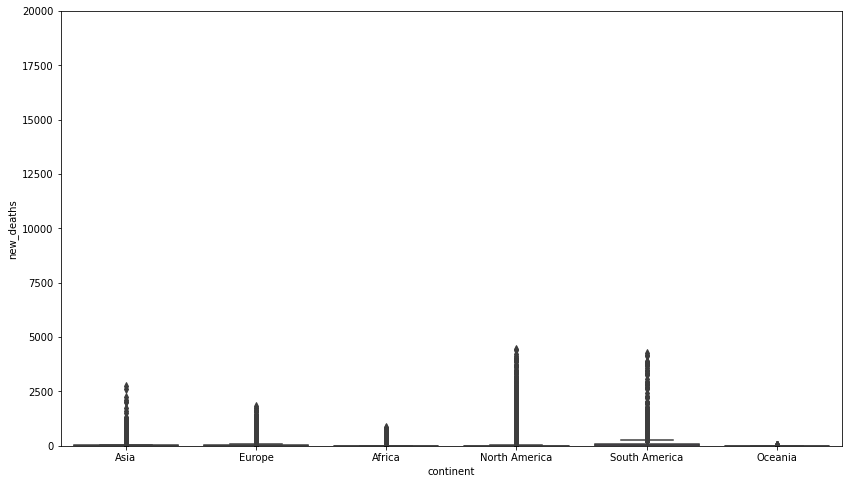

In [649]:
var = 'continent'
data = pd.concat([train['new_deaths'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_deaths", data=data)
fig.axis(ymin=0, ymax=20000);

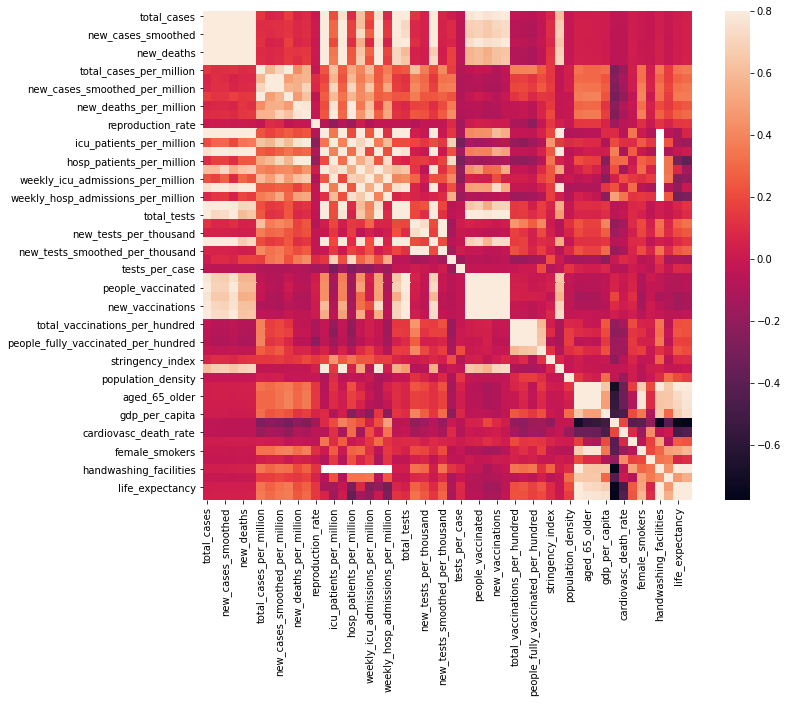

In [650]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

UK

In [651]:
country = "United Kingdom"

include_uk = train[train['location'].values == country]
exclude_uk = train[train['location'].values != country]
uk_cov19 = include_uk
uk_cov19

iso_code continent  ... human_development_index  date_num
79050      GBR    Europe  ...                   0.932  31012020
79051      GBR    Europe  ...                   0.932  01022020
79052      GBR    Europe  ...                   0.932  02022020
79053      GBR    Europe  ...                   0.932  03022020
79054      GBR    Europe  ...                   0.932  04022020
...        ...       ...  ...                     ...       ...
79495      GBR    Europe  ...                   0.932  20042021
79496      GBR    Europe  ...                   0.932  21042021
79497      GBR    Europe  ...                   0.932  22042021
79498      GBR    Europe  ...                   0.932  23042021
79499      GBR    Europe  ...                   0.932  24042021

[450 rows x 60 columns]

Text(0, 0.5, 'uk_new_cases_per_million')

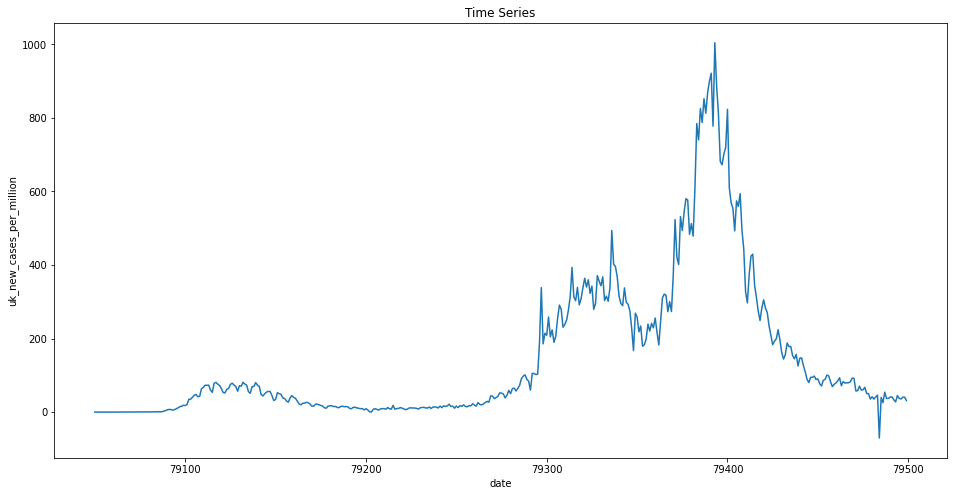

In [652]:
import matplotlib.pyplot as plt

uk_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("uk_new_cases_per_million")

Text(0, 0.5, 'uk_new_deaths_per_million')

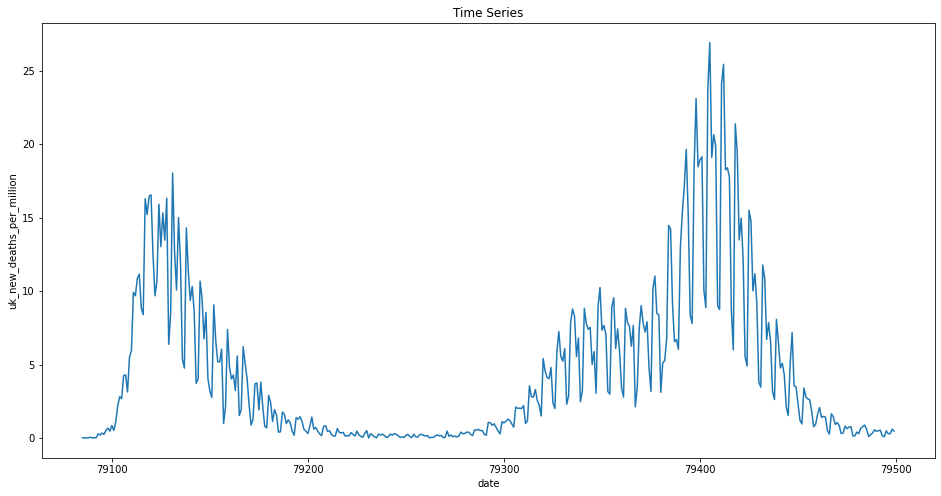

In [653]:
uk_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("uk_new_deaths_per_million")

US

In [654]:
country = "United States"

include_us = train[train['location'].values == country]
exclude_us = train[train['location'].values != country]
us_cov19 = include_us
us_cov19

iso_code      continent  ... human_development_index  date_num
79500      USA  North America  ...                   0.926  22012020
79501      USA  North America  ...                   0.926  23012020
79502      USA  North America  ...                   0.926  24012020
79503      USA  North America  ...                   0.926  25012020
79504      USA  North America  ...                   0.926  26012020
...        ...            ...  ...                     ...       ...
79954      USA  North America  ...                   0.926  20042021
79955      USA  North America  ...                   0.926  21042021
79956      USA  North America  ...                   0.926  22042021
79957      USA  North America  ...                   0.926  23042021
79958      USA  North America  ...                   0.926  24042021

[459 rows x 60 columns]

Text(0, 0.5, 'us_new_cases_per_million')

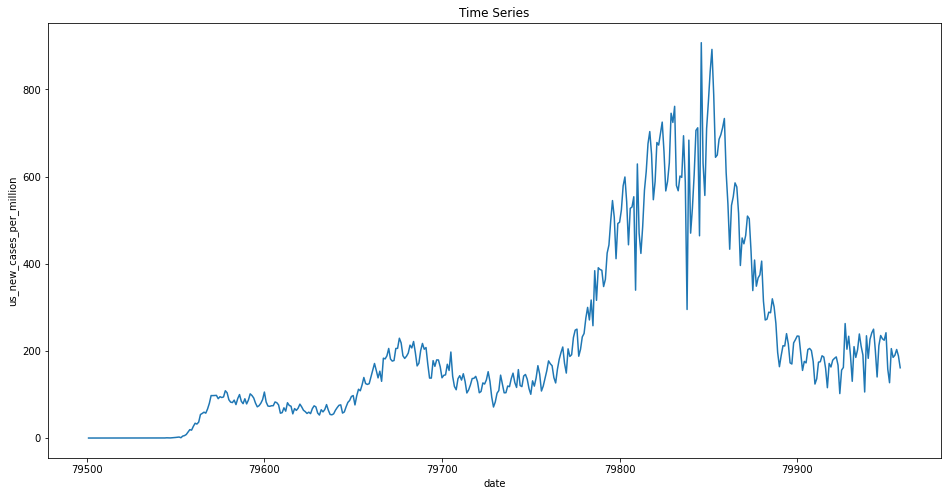

In [655]:
us_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_cases_per_million")

Text(0, 0.5, 'us_new_deaths_per_million')

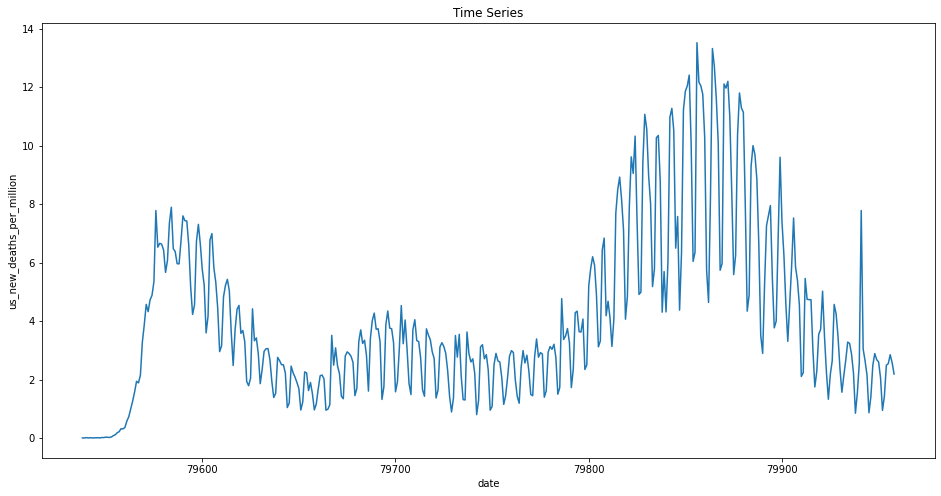

In [656]:
us_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_deaths_per_million")

France

In [657]:
country = "France"

include_fr = train[train['location'].values == country] 
exclude_fr = train[train['location'].values != country]
fr_cov19 = include_fr
fr_cov19

iso_code continent  ... human_development_index  date_num
27394      FRA    Europe  ...                   0.901  24012020
27395      FRA    Europe  ...                   0.901  25012020
27396      FRA    Europe  ...                   0.901  26012020
27397      FRA    Europe  ...                   0.901  27012020
27398      FRA    Europe  ...                   0.901  28012020
...        ...       ...  ...                     ...       ...
27846      FRA    Europe  ...                   0.901  20042021
27847      FRA    Europe  ...                   0.901  21042021
27848      FRA    Europe  ...                   0.901  22042021
27849      FRA    Europe  ...                   0.901  23042021
27850      FRA    Europe  ...                   0.901  24042021

[457 rows x 60 columns]

Text(0, 0.5, 'france_new_cases_per_million')

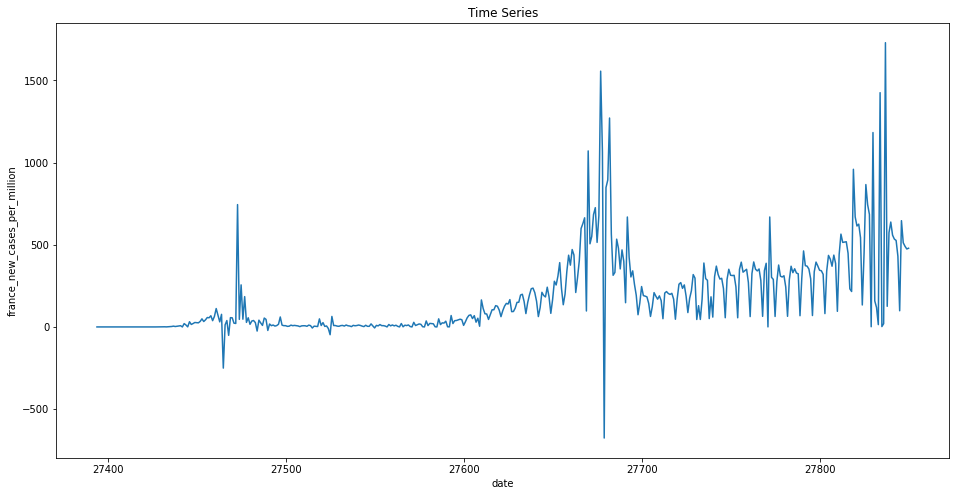

In [658]:
fr_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("france_new_cases_per_million")

Text(0, 0.5, 'france_new_deaths_per_million')

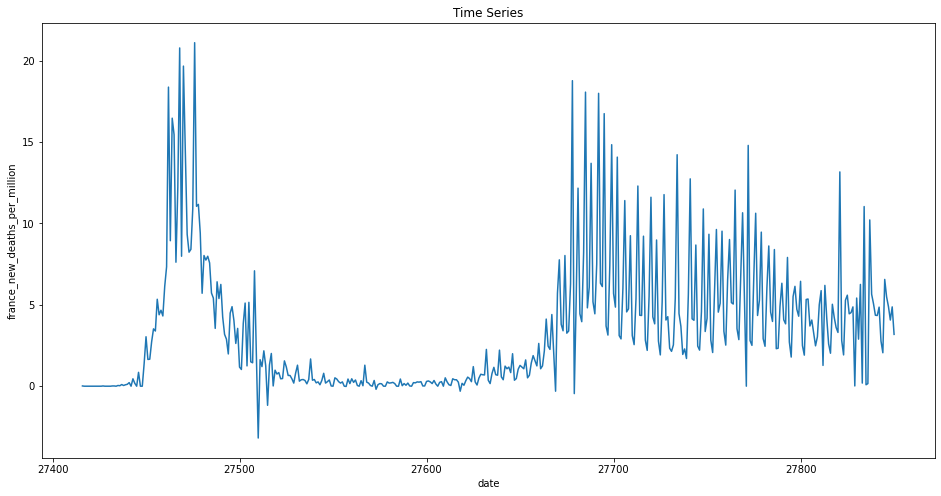

In [659]:
fr_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("france_new_deaths_per_million")

Italy

In [660]:
country = "Italy"

include_it = train[train['location'].values == country] 
exclude_it = train[train['location'].values != country]
it_cov19 = include_it
it_cov19

iso_code continent  ... human_development_index  date_num
37594      ITA    Europe  ...                   0.892  31012020
37595      ITA    Europe  ...                   0.892  01022020
37596      ITA    Europe  ...                   0.892  02022020
37597      ITA    Europe  ...                   0.892  03022020
37598      ITA    Europe  ...                   0.892  04022020
...        ...       ...  ...                     ...       ...
38039      ITA    Europe  ...                   0.892  20042021
38040      ITA    Europe  ...                   0.892  21042021
38041      ITA    Europe  ...                   0.892  22042021
38042      ITA    Europe  ...                   0.892  23042021
38043      ITA    Europe  ...                   0.892  24042021

[450 rows x 60 columns]

Text(0, 0.5, 'italy_new_cases_per_million')

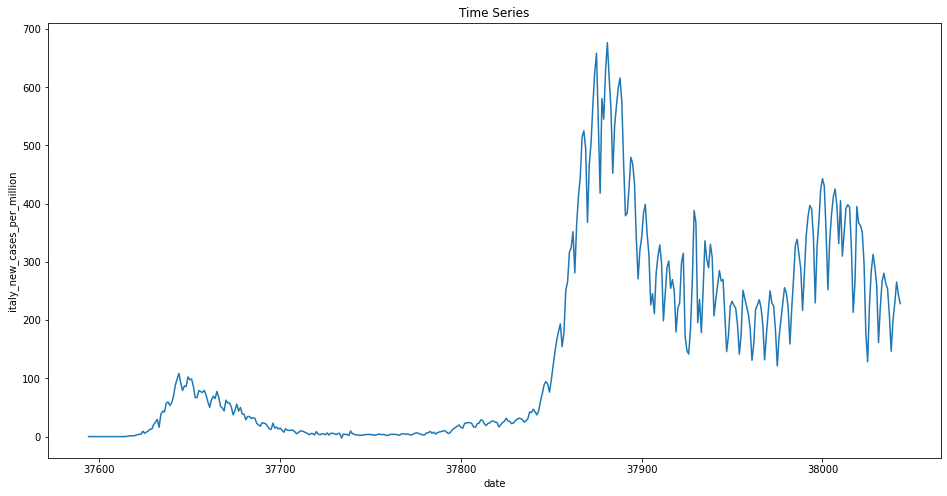

In [661]:
it_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("italy_new_cases_per_million")

Text(0, 0.5, 'italy_new_deaths_per_million')

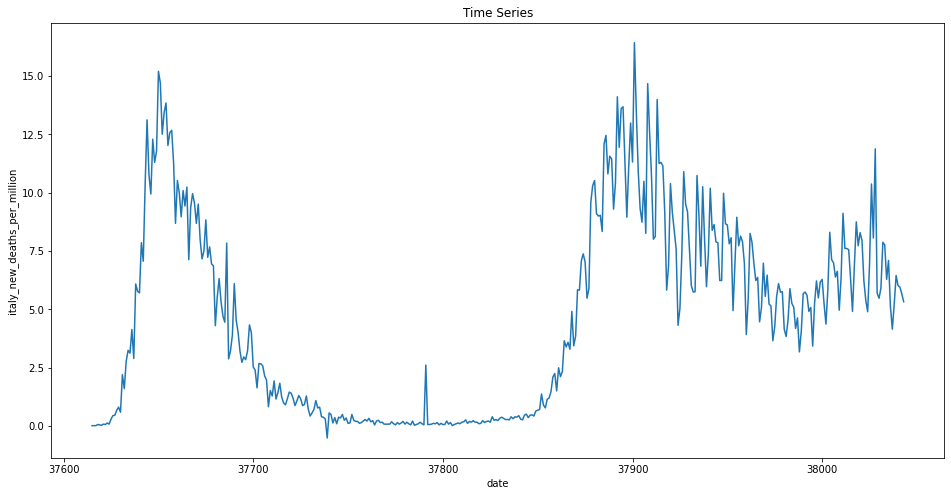

In [662]:
it_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("italy_new_deaths_per_million")

Brazil

In [663]:
country = "Brazil"

include_br = train[train['location'].values == country] 
exclude_br = train[train['location'].values != country]
br_cov19 = include_br
br_cov19

iso_code      continent  ... human_development_index  date_num
10751      BRA  South America  ...                   0.765  26022020
10752      BRA  South America  ...                   0.765  27022020
10753      BRA  South America  ...                   0.765  28022020
10754      BRA  South America  ...                   0.765  29022020
10755      BRA  South America  ...                   0.765  01032020
...        ...            ...  ...                     ...       ...
11170      BRA  South America  ...                   0.765  20042021
11171      BRA  South America  ...                   0.765  21042021
11172      BRA  South America  ...                   0.765  22042021
11173      BRA  South America  ...                   0.765  23042021
11174      BRA  South America  ...                   0.765  24042021

[424 rows x 60 columns]

Text(0, 0.5, 'brazil_new_cases_per_million')

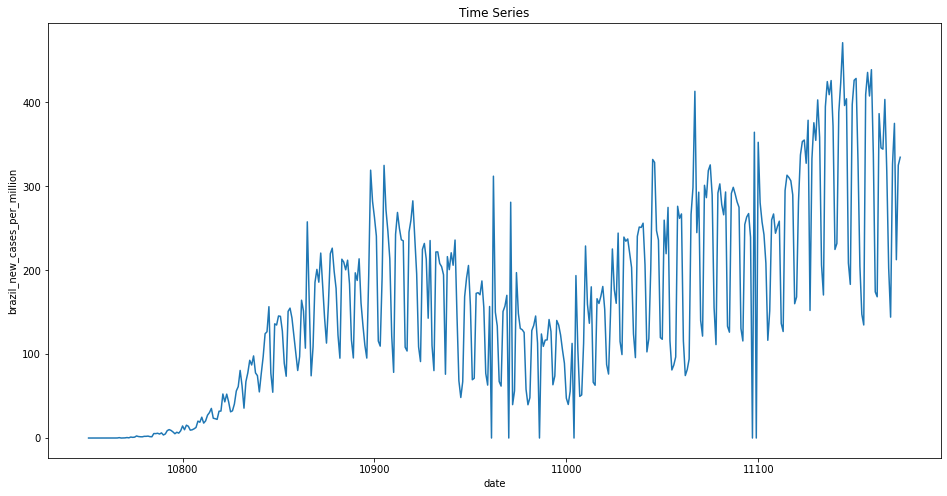

In [664]:
br_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("brazil_new_cases_per_million")

Text(0, 0.5, 'brazil_new_deaths_per_million')

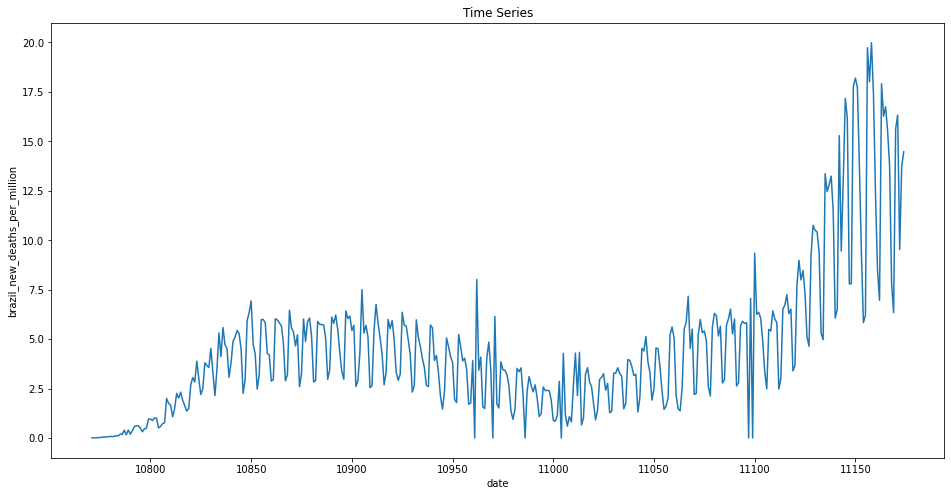

In [665]:
br_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("brazil_new_deaths_per_million")

Portugal

In [666]:
country = "Portugal"

include_p = train[train['location'].values == country]
exclude_p = train[train['location'].values != country]
p_cov19 = include_p
p_cov19

iso_code continent  ... human_development_index  date_num
60883      PRT    Europe  ...                   0.864  02022020
60884      PRT    Europe  ...                   0.864  09022020
60885      PRT    Europe  ...                   0.864  15022020
60886      PRT    Europe  ...                   0.864  23022020
60887      PRT    Europe  ...                   0.864  01032020
...        ...       ...  ...                     ...       ...
61302      PRT    Europe  ...                   0.864  20042021
61303      PRT    Europe  ...                   0.864  21042021
61304      PRT    Europe  ...                   0.864  22042021
61305      PRT    Europe  ...                   0.864  23042021
61306      PRT    Europe  ...                   0.864  24042021

[424 rows x 60 columns]

Text(0, 0.5, 'portugal_new_cases_per_million')

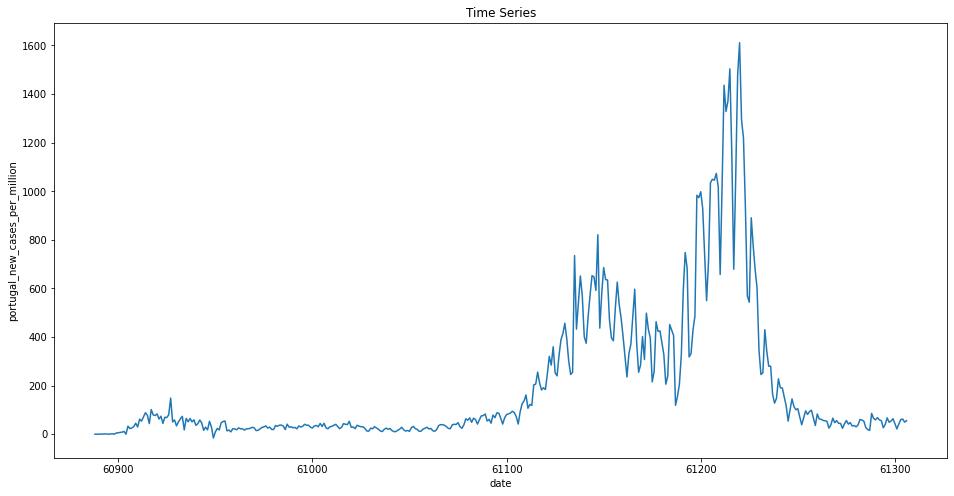

In [667]:
p_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("portugal_new_cases_per_million")

Text(0, 0.5, 'portugal_new_deaths_per_million')

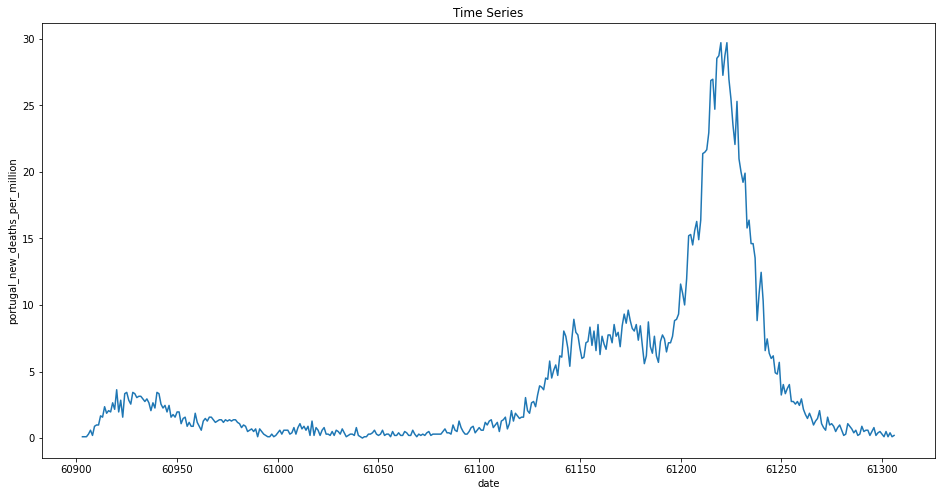

In [668]:
p_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("portugal_new_deaths_per_million")

Spain

In [669]:
country = "Spain"

include_sp = train[train['location'].values == country]
exclude_sp = train[train['location'].values != country]
sp_cov19 = include_sp
sp_cov19

iso_code continent  ... human_development_index  date_num
70949      ESP    Europe  ...                   0.904  01022020
70950      ESP    Europe  ...                   0.904  02022020
70951      ESP    Europe  ...                   0.904  03022020
70952      ESP    Europe  ...                   0.904  04022020
70953      ESP    Europe  ...                   0.904  05022020
...        ...       ...  ...                     ...       ...
71393      ESP    Europe  ...                   0.904  20042021
71394      ESP    Europe  ...                   0.904  21042021
71395      ESP    Europe  ...                   0.904  22042021
71396      ESP    Europe  ...                   0.904  23042021
71397      ESP    Europe  ...                   0.904  24042021

[449 rows x 60 columns]

Text(0, 0.5, 'spain_new_cases_per_million')

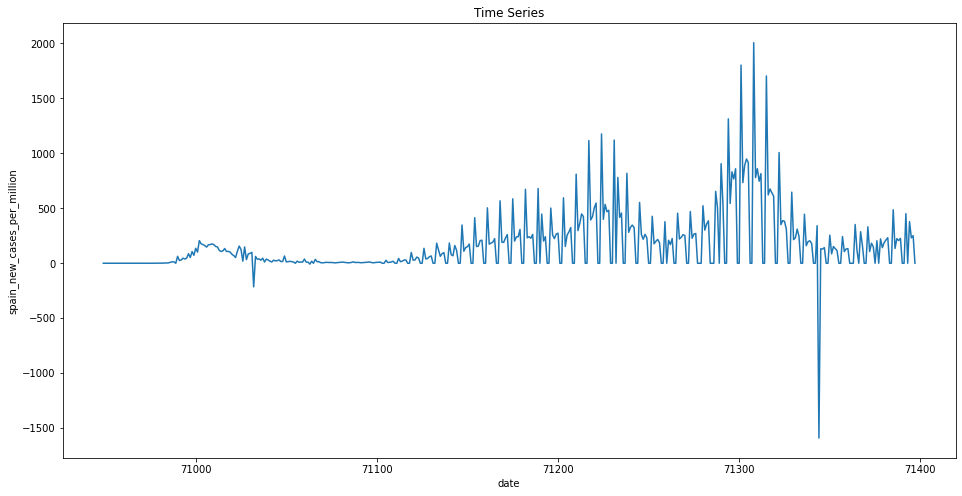

In [670]:
sp_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("spain_new_cases_per_million")

Text(0, 0.5, 'spain_new_deaths_per_million')

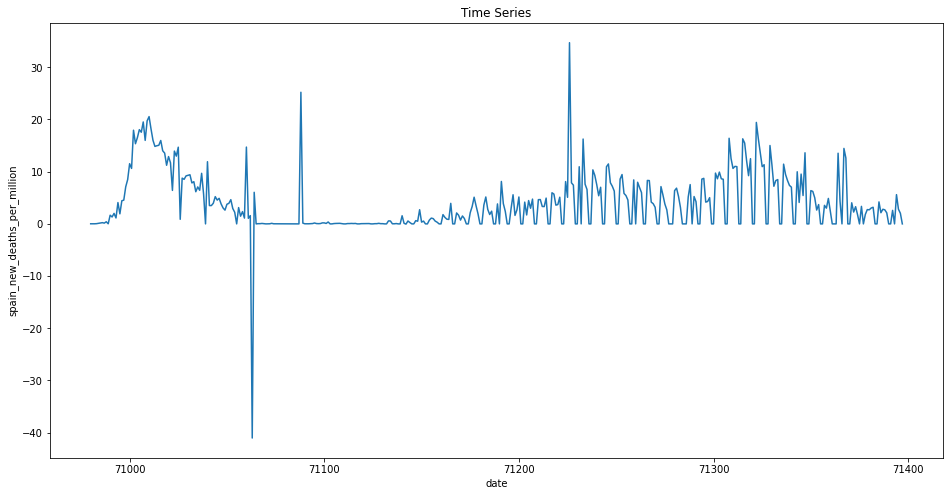

In [671]:
sp_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("spain_new_deaths_per_million")

India

In [672]:
country = "India"

include_i = train[train['location'].values == country]
exclude_i = train[train['location'].values != country]
i_cov19 = include_i
i_cov19

iso_code continent  ... human_development_index  date_num
34479      IND      Asia  ...                   0.645  30012020
34480      IND      Asia  ...                   0.645  31012020
34481      IND      Asia  ...                   0.645  01022020
34482      IND      Asia  ...                   0.645  02022020
34483      IND      Asia  ...                   0.645  03022020
...        ...       ...  ...                     ...       ...
34925      IND      Asia  ...                   0.645  20042021
34926      IND      Asia  ...                   0.645  21042021
34927      IND      Asia  ...                   0.645  22042021
34928      IND      Asia  ...                   0.645  23042021
34929      IND      Asia  ...                   0.645  24042021

[451 rows x 60 columns]

Text(0, 0.5, 'i_new_cases_per_million')

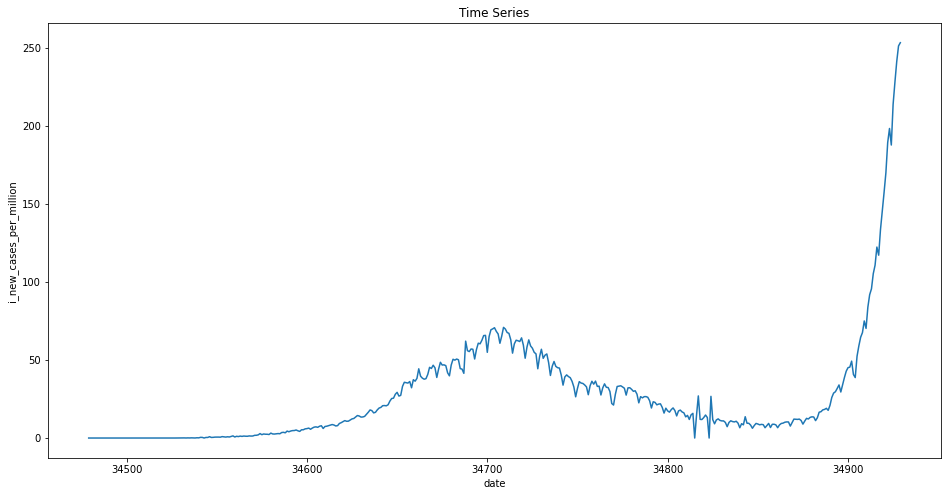

In [673]:
i_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("i_new_cases_per_million")

Text(0, 0.5, 'i_new_deaths_per_million')

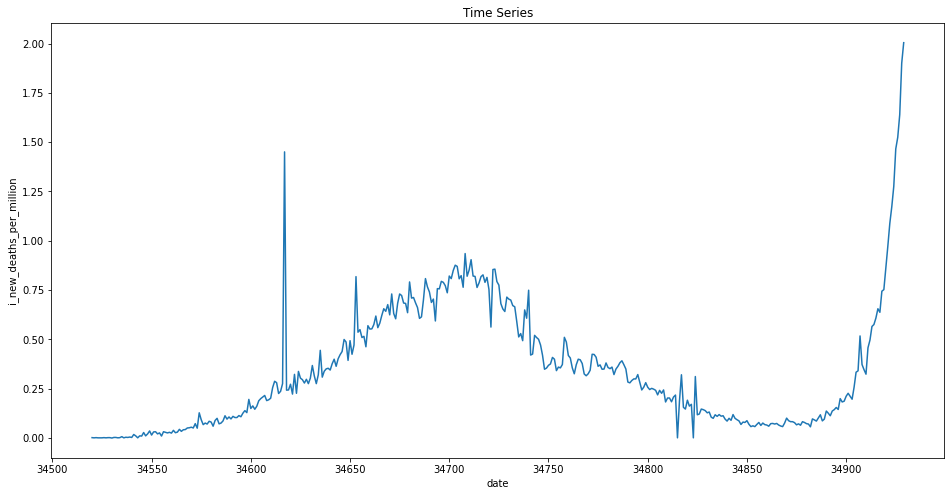

In [674]:
i_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("i_new_deaths_per_million")

Sri Lanka

In [675]:
country = "Sri Lanka"

include_sl = train[train['location'].values == country]
exclude_sl = train[train['location'].values != country]
sl_cov19 = include_sl
sl_cov19

iso_code continent  ... human_development_index  date_num
71398      LKA      Asia  ...                   0.782  27012020
71399      LKA      Asia  ...                   0.782  28012020
71400      LKA      Asia  ...                   0.782  29012020
71401      LKA      Asia  ...                   0.782  30012020
71402      LKA      Asia  ...                   0.782  31012020
...        ...       ...  ...                     ...       ...
71847      LKA      Asia  ...                   0.782  20042021
71848      LKA      Asia  ...                   0.782  21042021
71849      LKA      Asia  ...                   0.782  22042021
71850      LKA      Asia  ...                   0.782  23042021
71851      LKA      Asia  ...                   0.782  24042021

[454 rows x 60 columns]

Text(0, 0.5, 'sl_new_cases_per_million')

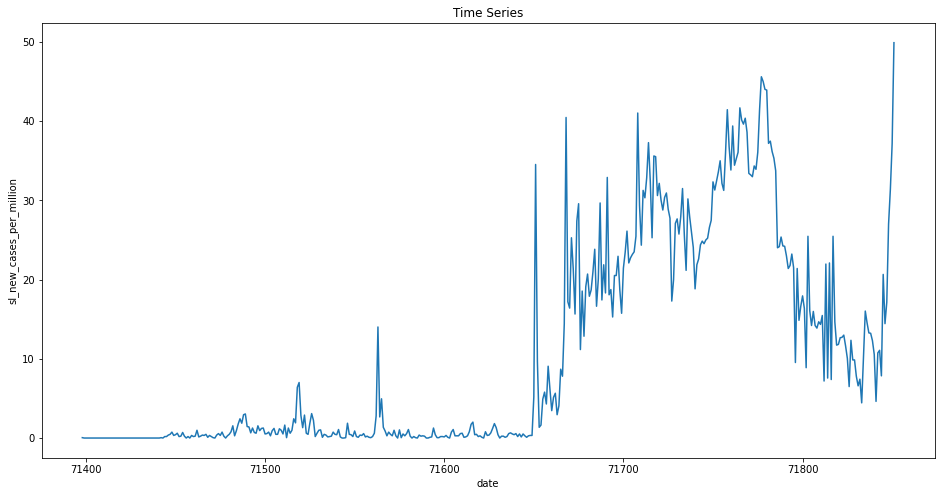

In [676]:
sl_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sl_new_cases_per_million")

Text(0, 0.5, 'sl_new_deaths_per_million')

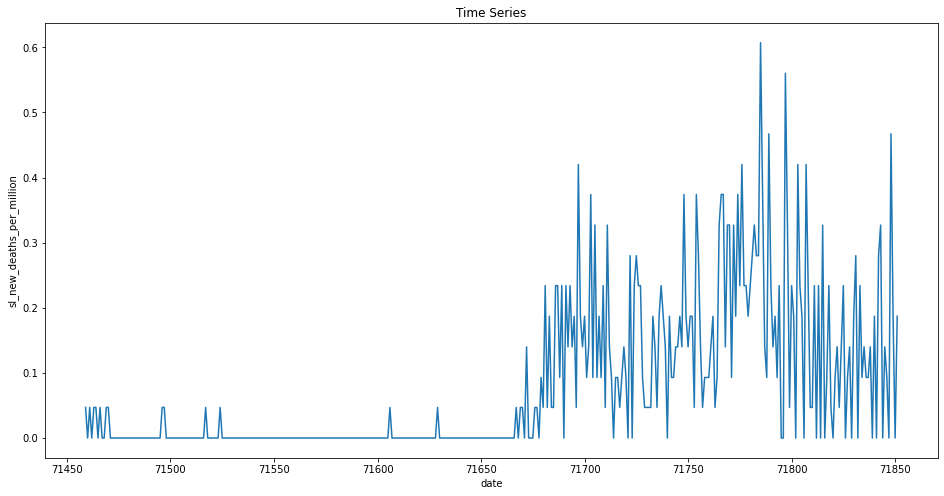

In [677]:
sl_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sl_new_deaths_per_million")

China

In [678]:
country = "China"

include_c = train[train['location'].values == country]
exclude_c = train[train['location'].values != country]
c_cov19 = include_c
c_cov19

iso_code continent  ... human_development_index  date_num
15878      CHN      Asia  ...                   0.761  22012020
15879      CHN      Asia  ...                   0.761  23012020
15880      CHN      Asia  ...                   0.761  24012020
15881      CHN      Asia  ...                   0.761  25012020
15882      CHN      Asia  ...                   0.761  26012020
...        ...       ...  ...                     ...       ...
16332      CHN      Asia  ...                   0.761  20042021
16333      CHN      Asia  ...                   0.761  21042021
16334      CHN      Asia  ...                   0.761  22042021
16335      CHN      Asia  ...                   0.761  23042021
16336      CHN      Asia  ...                   0.761  24042021

[459 rows x 60 columns]

Text(0, 0.5, 'china_new_cases_per_million')

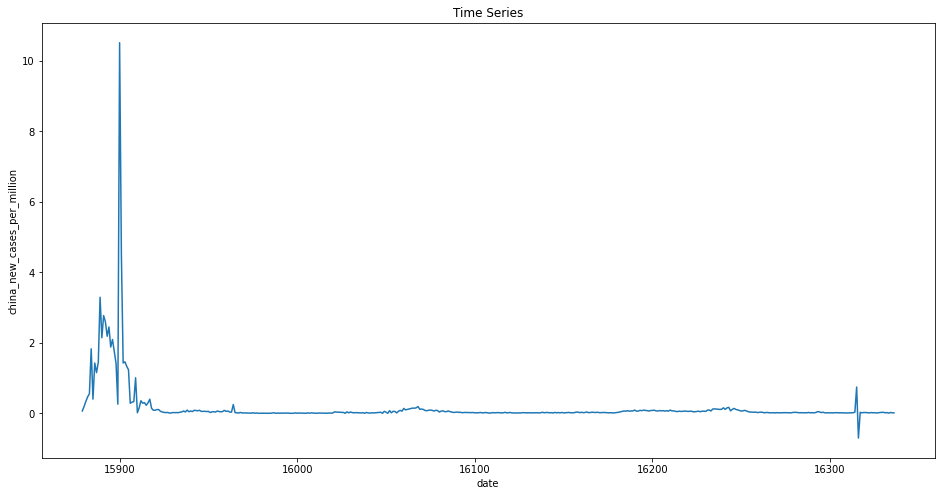

In [679]:
c_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("china_new_cases_per_million")

Text(0, 0.5, 'china_new_deaths_per_million')

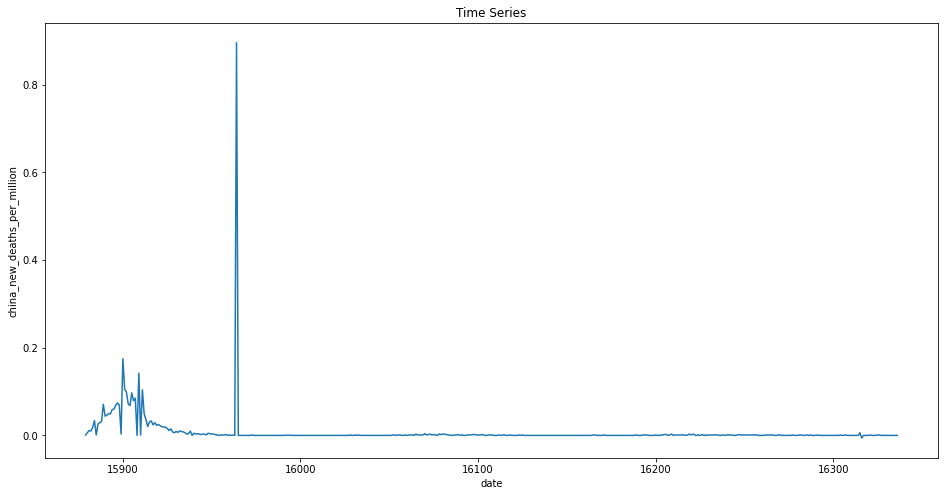

In [680]:
c_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("china_new_deaths_per_million")

Taiwan

In [681]:
country = "Taiwan"

include_t = train[train['location'].values == country]
exclude_t = train[train['location'].values != country]
t_cov19 = include_t
t_cov19

iso_code continent  ... human_development_index  date_num
73941      TWN      Asia  ...                     NaN  16012020
73942      TWN      Asia  ...                     NaN  17012020
73943      TWN      Asia  ...                     NaN  18012020
73944      TWN      Asia  ...                     NaN  19012020
73945      TWN      Asia  ...                     NaN  20012020
...        ...       ...  ...                     ...       ...
74401      TWN      Asia  ...                     NaN  20042021
74402      TWN      Asia  ...                     NaN  21042021
74403      TWN      Asia  ...                     NaN  22042021
74404      TWN      Asia  ...                     NaN  23042021
74405      TWN      Asia  ...                     NaN  24042021

[465 rows x 60 columns]

Text(0, 0.5, 'taiwan_new_cases_per_million')

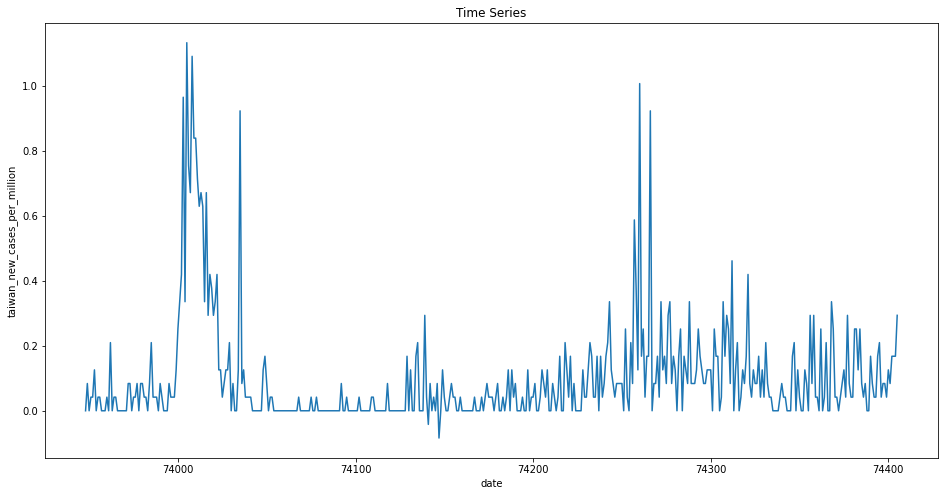

In [682]:
t_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("taiwan_new_cases_per_million")

Text(0, 0.5, 'taiwan_new_deaths_per_million')

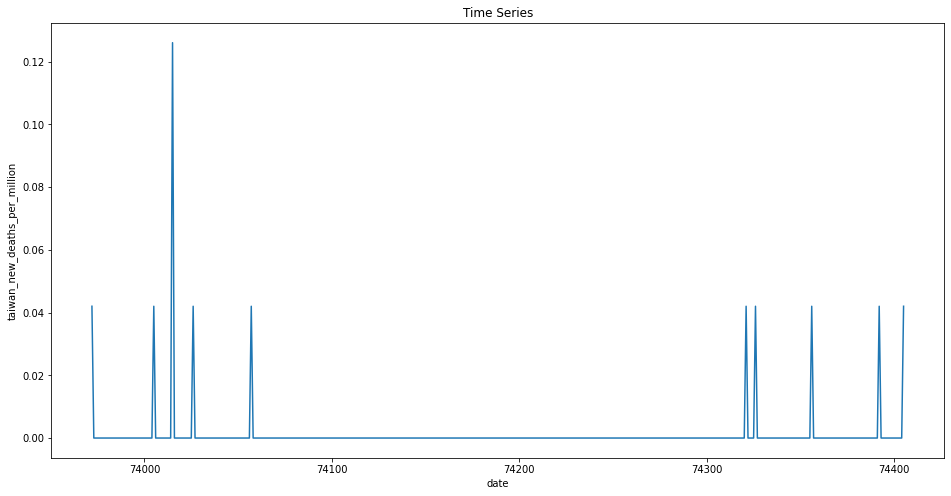

In [683]:
t_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("taiwan_new_deaths_per_million")

Japan

In [684]:
country = "Japan"

include_j = train[train['location'].values == country]
exclude_j = train[train['location'].values != country]
j_cov19 = include_j
j_cov19

iso_code continent  ... human_development_index  date_num
38454      JPN      Asia  ...                   0.919  22012020
38455      JPN      Asia  ...                   0.919  23012020
38456      JPN      Asia  ...                   0.919  24012020
38457      JPN      Asia  ...                   0.919  25012020
38458      JPN      Asia  ...                   0.919  26012020
...        ...       ...  ...                     ...       ...
38908      JPN      Asia  ...                   0.919  20042021
38909      JPN      Asia  ...                   0.919  21042021
38910      JPN      Asia  ...                   0.919  22042021
38911      JPN      Asia  ...                   0.919  23042021
38912      JPN      Asia  ...                   0.919  24042021

[459 rows x 60 columns]

Text(0, 0.5, 'japan_new_cases_per_million')

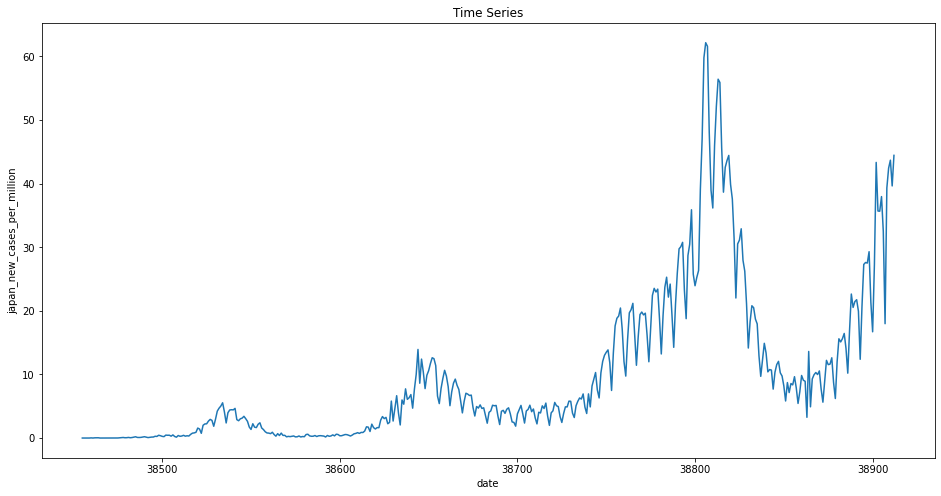

In [685]:
j_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("japan_new_cases_per_million")

Text(0, 0.5, 'japan_new_deaths_per_million')

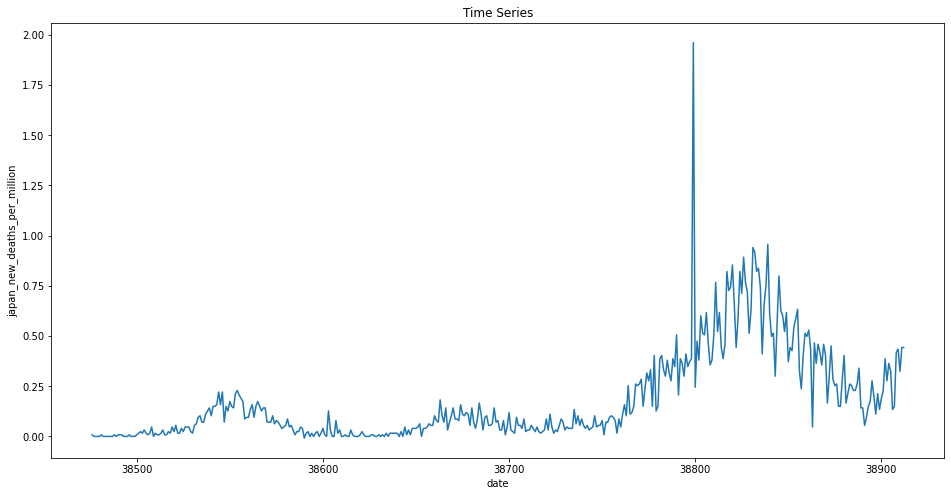

In [686]:
j_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("japan_new_deaths_per_million")

New Zealand

In [687]:
country = "New Zealand"

include_nz = train[train['location'].values == country]
exclude_nz = train[train['location'].values != country]
nz_cov19 = include_nz
nz_cov19

iso_code continent  ... human_development_index  date_num
53535      NZL   Oceania  ...                   0.931  28022020
53536      NZL   Oceania  ...                   0.931  29022020
53537      NZL   Oceania  ...                   0.931  01032020
53538      NZL   Oceania  ...                   0.931  02032020
53539      NZL   Oceania  ...                   0.931  03032020
...        ...       ...  ...                     ...       ...
53952      NZL   Oceania  ...                   0.931  20042021
53953      NZL   Oceania  ...                   0.931  21042021
53954      NZL   Oceania  ...                   0.931  22042021
53955      NZL   Oceania  ...                   0.931  23042021
53956      NZL   Oceania  ...                   0.931  24042021

[422 rows x 60 columns]

Text(0, 0.5, 'new_zealand_new_cases_per_million')

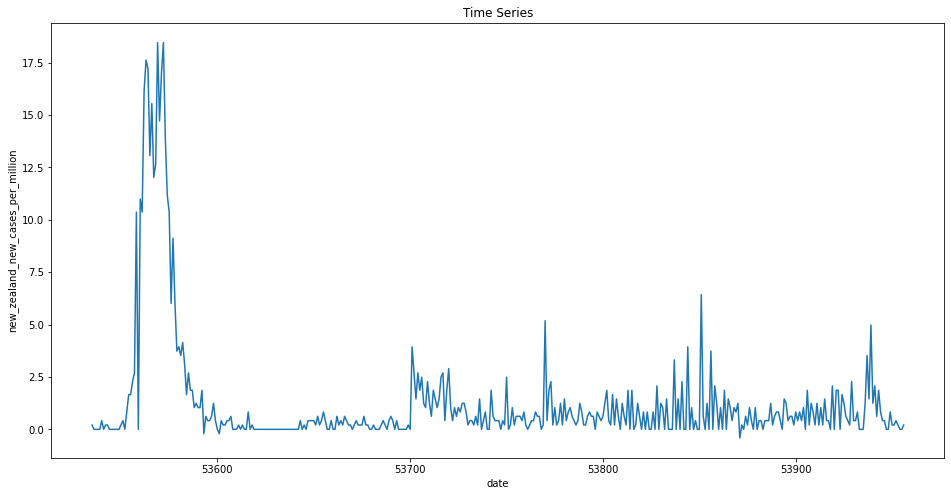

In [688]:
nz_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("new_zealand_new_cases_per_million")

Text(0, 0.5, 'new_zealand_new_deaths_per_million')

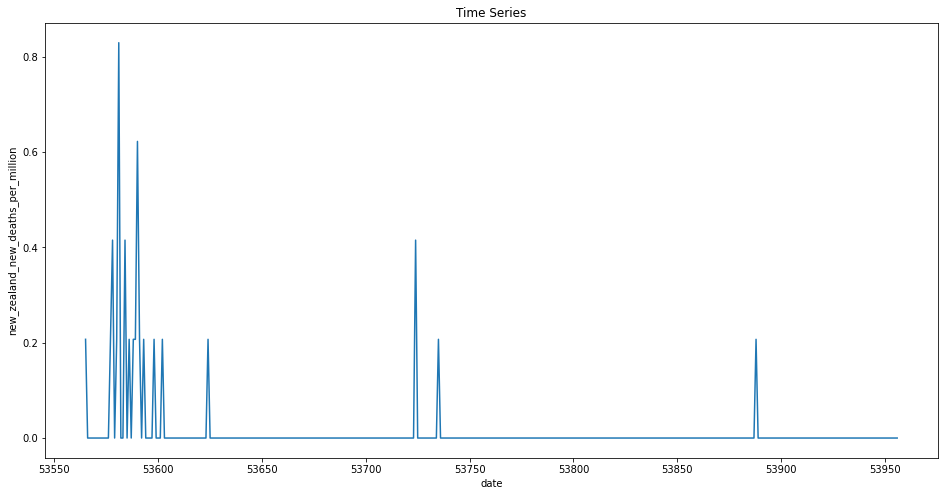

In [689]:
nz_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("new_zealand_new_deaths_per_million")

Australia

In [690]:
country = "Australia"

include_a = train[train['location'].values == country]
exclude_a = train[train['location'].values != country]
a_cov19 = include_a
a_cov19

iso_code continent  ... human_development_index  date_num
4395      AUS   Oceania  ...                   0.944  26012020
4396      AUS   Oceania  ...                   0.944  27012020
4397      AUS   Oceania  ...                   0.944  28012020
4398      AUS   Oceania  ...                   0.944  29012020
4399      AUS   Oceania  ...                   0.944  30012020
...       ...       ...  ...                     ...       ...
4845      AUS   Oceania  ...                   0.944  20042021
4846      AUS   Oceania  ...                   0.944  21042021
4847      AUS   Oceania  ...                   0.944  22042021
4848      AUS   Oceania  ...                   0.944  23042021
4849      AUS   Oceania  ...                   0.944  24042021

[455 rows x 60 columns]

Text(0, 0.5, 'australia_new_cases_per_million')

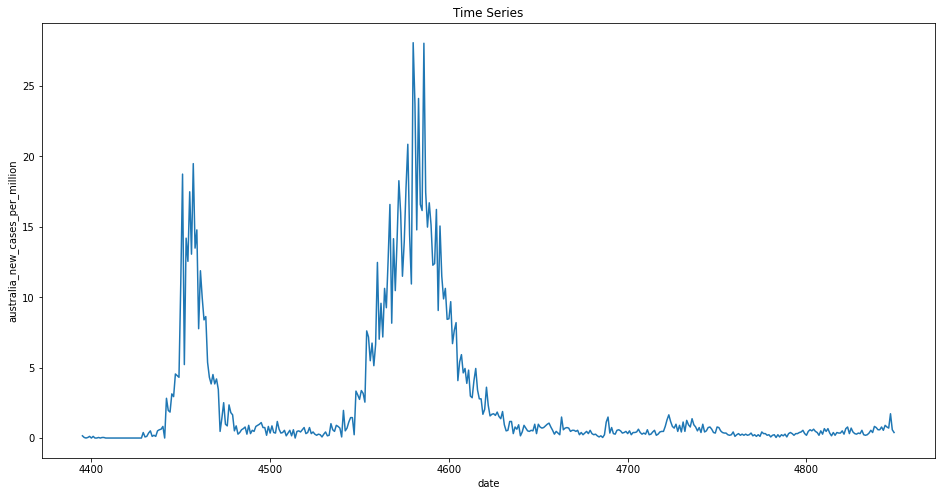

In [691]:
a_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("australia_new_cases_per_million")

Text(0, 0.5, 'australia_new_deaths_per_million')

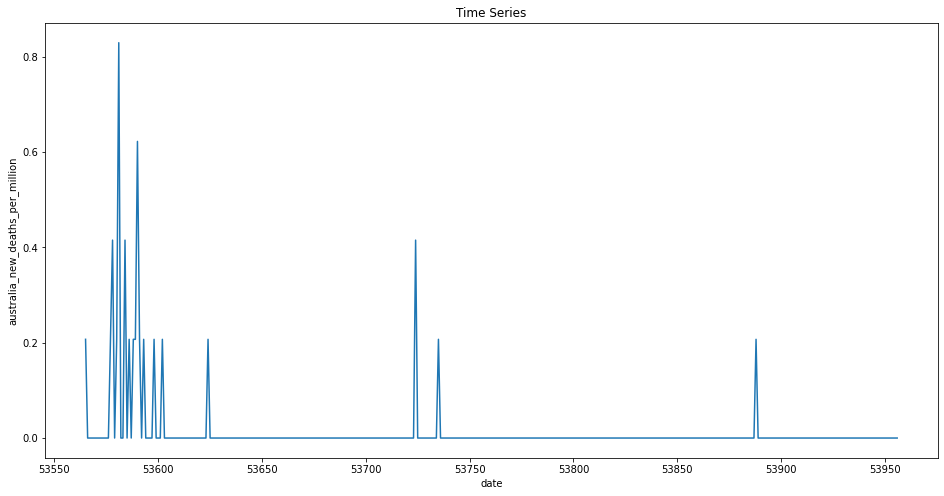

In [692]:
nz_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("australia_new_deaths_per_million")

South Africa

In [693]:
country = "South Africa"

include_sa = train[train['location'].values == country]
exclude_sa = train[train['location'].values != country]
sa_cov19 = include_sa
sa_cov19

iso_code continent  ... human_development_index  date_num
69233      ZAF    Africa  ...                   0.709  07022020
69234      ZAF    Africa  ...                   0.709  08022020
69235      ZAF    Africa  ...                   0.709  09022020
69236      ZAF    Africa  ...                   0.709  10022020
69237      ZAF    Africa  ...                   0.709  11022020
...        ...       ...  ...                     ...       ...
69671      ZAF    Africa  ...                   0.709  20042021
69672      ZAF    Africa  ...                   0.709  21042021
69673      ZAF    Africa  ...                   0.709  22042021
69674      ZAF    Africa  ...                   0.709  23042021
69675      ZAF    Africa  ...                   0.709  24042021

[443 rows x 60 columns]

Text(0, 0.5, 'sa_new_cases_per_million')

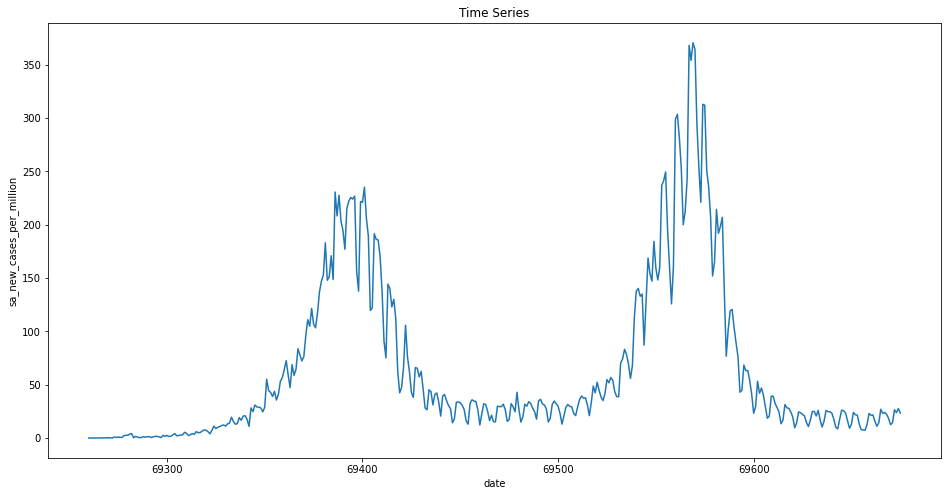

In [694]:
sa_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sa_new_cases_per_million")

Text(0, 0.5, 'sa_new_deaths_per_million')

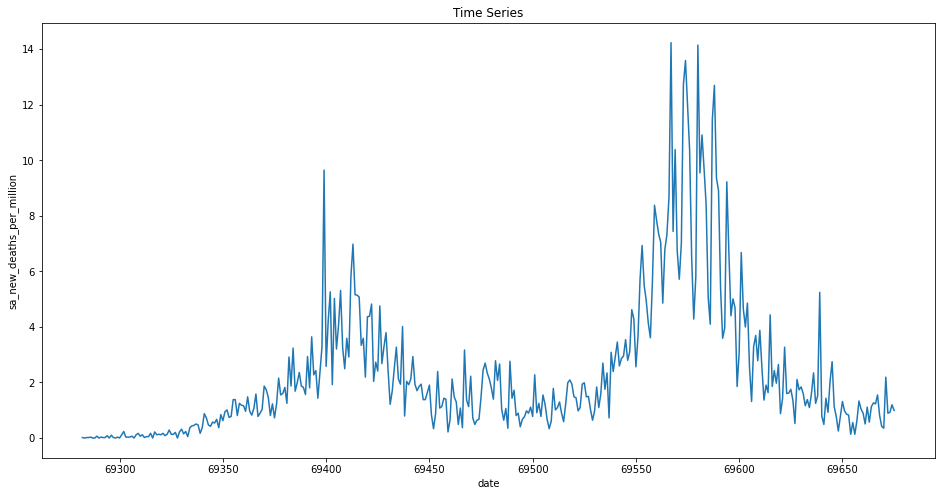

In [695]:
sa_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sa_new_deaths_per_million")

Nigeria

In [696]:
country = "Nigeria"

include_n = train[train['location'].values == country]
exclude_n = train[train['location'].values != country]
n_cov19 = include_n
n_cov19

iso_code continent  ... human_development_index  date_num
54760      NGA    Africa  ...                   0.539  28022020
54761      NGA    Africa  ...                   0.539  29022020
54762      NGA    Africa  ...                   0.539  01032020
54763      NGA    Africa  ...                   0.539  02032020
54764      NGA    Africa  ...                   0.539  03032020
...        ...       ...  ...                     ...       ...
55177      NGA    Africa  ...                   0.539  20042021
55178      NGA    Africa  ...                   0.539  21042021
55179      NGA    Africa  ...                   0.539  22042021
55180      NGA    Africa  ...                   0.539  23042021
55181      NGA    Africa  ...                   0.539  24042021

[422 rows x 60 columns]

Text(0, 0.5, 'n_new_cases_per_million')

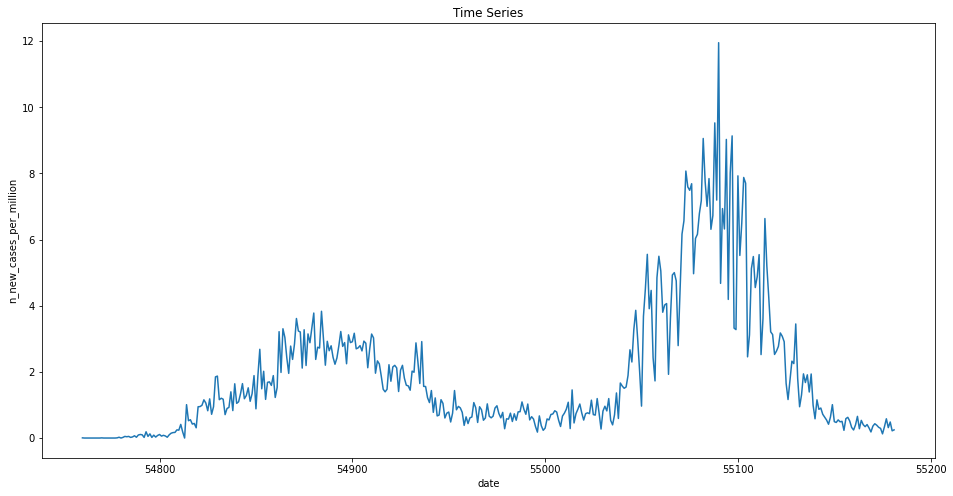

In [697]:
n_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("n_new_cases_per_million")

Text(0, 0.5, 'n_new_deaths_per_million')

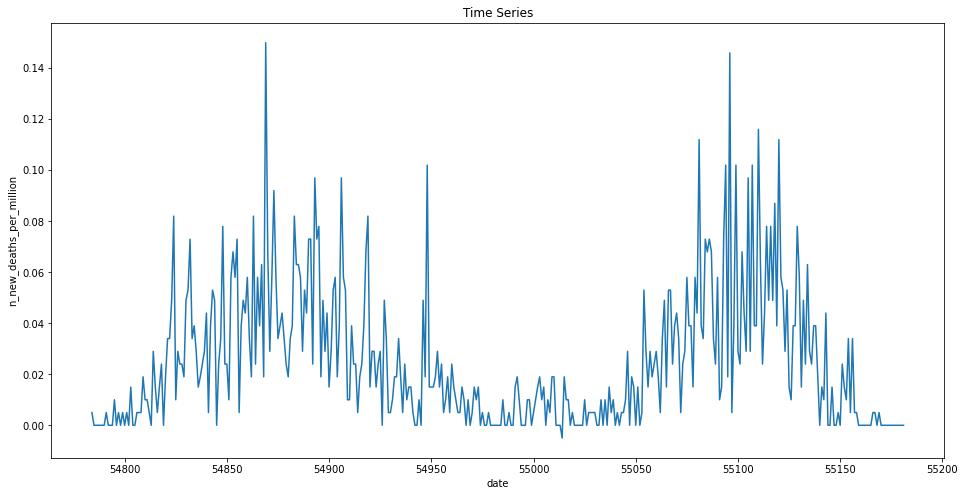

In [698]:
n_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("n_new_deaths_per_million")

Sweden

In [699]:
country = "Sweden"

include_s = train[train['location'].values == country]
exclude_s = train[train['location'].values != country]
s_cov19 = include_s
s_cov19

iso_code continent  ... human_development_index  date_num
72668      SWE    Europe  ...                   0.945  01022020
72669      SWE    Europe  ...                   0.945  02022020
72670      SWE    Europe  ...                   0.945  03022020
72671      SWE    Europe  ...                   0.945  04022020
72672      SWE    Europe  ...                   0.945  05022020
...        ...       ...  ...                     ...       ...
73112      SWE    Europe  ...                   0.945  20042021
73113      SWE    Europe  ...                   0.945  21042021
73114      SWE    Europe  ...                   0.945  22042021
73115      SWE    Europe  ...                   0.945  23042021
73116      SWE    Europe  ...                   0.945  24042021

[449 rows x 60 columns]

Text(0, 0.5, 'sweden_new_cases_per_million')

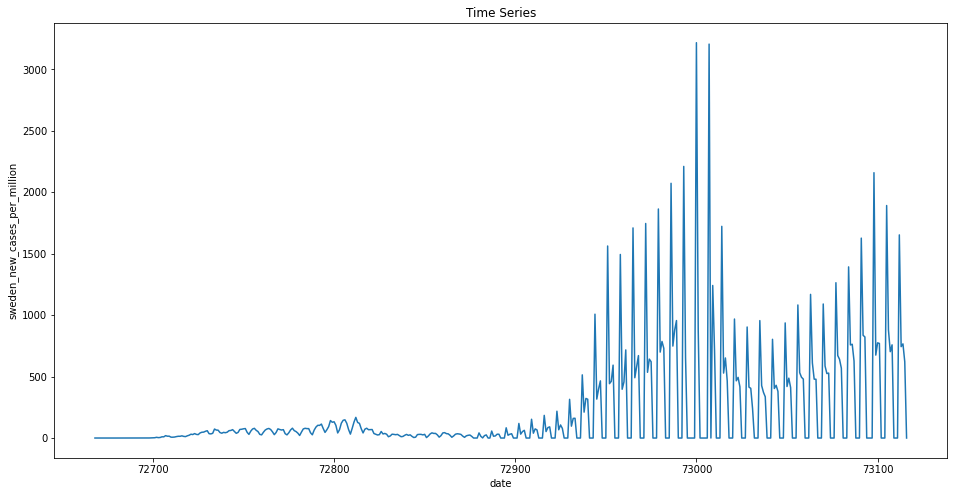

In [700]:
s_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sweden_new_cases_per_million")

Text(0, 0.5, 'sweden_new_deaths_per_million')

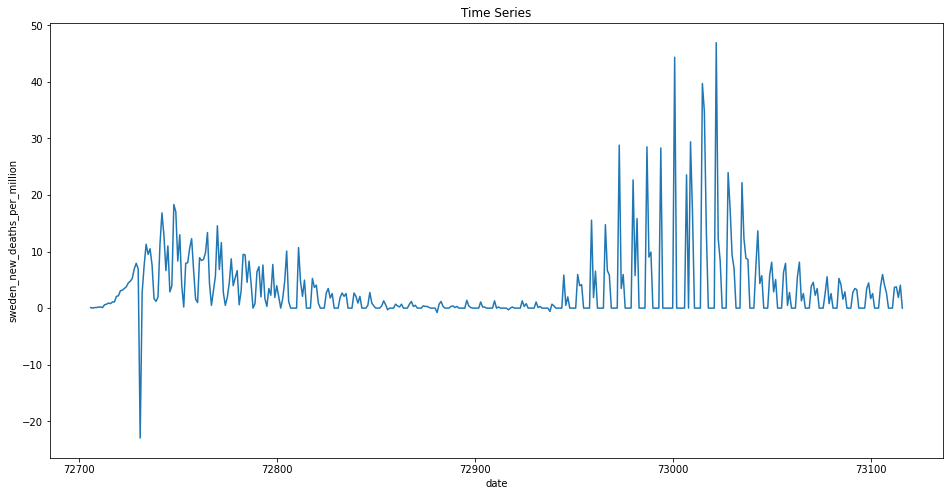

In [701]:
s_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sweden_new_deaths_per_million")

Denmark

In [702]:
country = "Denmark"

include_d = train[train['location'].values == country]
exclude_d = train[train['location'].values != country]
d_cov19 = include_d
d_cov19

iso_code continent  ... human_development_index  date_num
20448      DNK    Europe  ...                    0.94  02022020
20449      DNK    Europe  ...                    0.94  03022020
20450      DNK    Europe  ...                    0.94  04022020
20451      DNK    Europe  ...                    0.94  05022020
20452      DNK    Europe  ...                    0.94  06022020
...        ...       ...  ...                     ...       ...
20891      DNK    Europe  ...                    0.94  20042021
20892      DNK    Europe  ...                    0.94  21042021
20893      DNK    Europe  ...                    0.94  22042021
20894      DNK    Europe  ...                    0.94  23042021
20895      DNK    Europe  ...                    0.94  24042021

[448 rows x 60 columns]

Text(0, 0.5, 'denmark_new_cases_per_million')

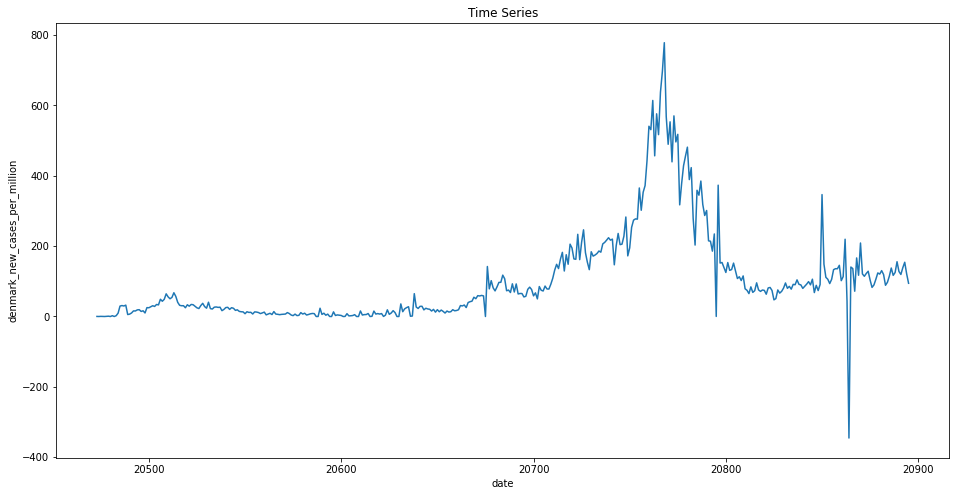

In [703]:
d_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("denmark_new_cases_per_million")

Text(0, 0.5, 'denmark_new_deaths_per_million')

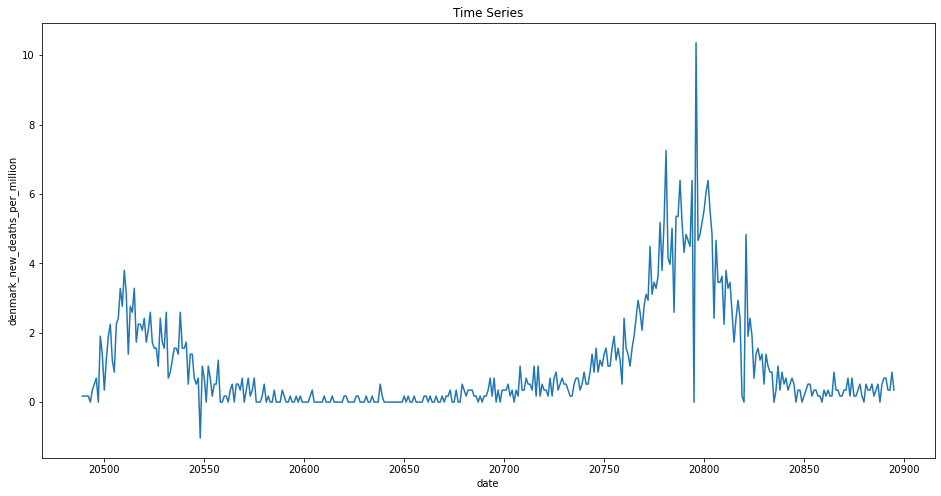

In [704]:
d_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("denmark_new_deaths_per_million")

Compare new cases per million to new deaths per million

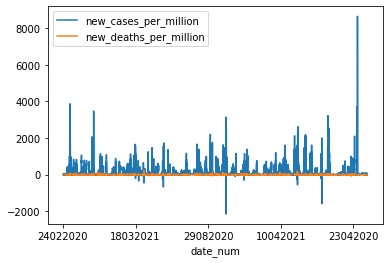

In [705]:
train.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

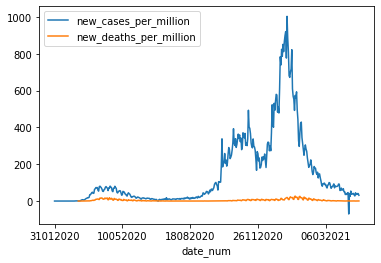

In [706]:
uk_cov19.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

Compare Countries

In [707]:
revised_uk_cov19 = uk_cov19[28:]
revised_uk_cov19

iso_code continent  ... human_development_index  date_num
79078      GBR    Europe  ...                   0.932  28022020
79079      GBR    Europe  ...                   0.932  29022020
79080      GBR    Europe  ...                   0.932  01032020
79081      GBR    Europe  ...                   0.932  02032020
79082      GBR    Europe  ...                   0.932  03032020
...        ...       ...  ...                     ...       ...
79495      GBR    Europe  ...                   0.932  20042021
79496      GBR    Europe  ...                   0.932  21042021
79497      GBR    Europe  ...                   0.932  22042021
79498      GBR    Europe  ...                   0.932  23042021
79499      GBR    Europe  ...                   0.932  24042021

[422 rows x 60 columns]

In [708]:
revised_us_cov19 = us_cov19[37:]
revised_us_cov19

iso_code      continent  ... human_development_index  date_num
79537      USA  North America  ...                   0.926  28022020
79538      USA  North America  ...                   0.926  29022020
79539      USA  North America  ...                   0.926  01032020
79540      USA  North America  ...                   0.926  02032020
79541      USA  North America  ...                   0.926  03032020
...        ...            ...  ...                     ...       ...
79954      USA  North America  ...                   0.926  20042021
79955      USA  North America  ...                   0.926  21042021
79956      USA  North America  ...                   0.926  22042021
79957      USA  North America  ...                   0.926  23042021
79958      USA  North America  ...                   0.926  24042021

[422 rows x 60 columns]

In [709]:
revised_fr_cov19 = fr_cov19[35:]
revised_fr_cov19

iso_code continent  ... human_development_index  date_num
27429      FRA    Europe  ...                   0.901  28022020
27430      FRA    Europe  ...                   0.901  29022020
27431      FRA    Europe  ...                   0.901  01032020
27432      FRA    Europe  ...                   0.901  02032020
27433      FRA    Europe  ...                   0.901  03032020
...        ...       ...  ...                     ...       ...
27846      FRA    Europe  ...                   0.901  20042021
27847      FRA    Europe  ...                   0.901  21042021
27848      FRA    Europe  ...                   0.901  22042021
27849      FRA    Europe  ...                   0.901  23042021
27850      FRA    Europe  ...                   0.901  24042021

[422 rows x 60 columns]

In [710]:
revised_it_cov19 = it_cov19[28:]
revised_it_cov19

iso_code continent  ... human_development_index  date_num
37622      ITA    Europe  ...                   0.892  28022020
37623      ITA    Europe  ...                   0.892  29022020
37624      ITA    Europe  ...                   0.892  01032020
37625      ITA    Europe  ...                   0.892  02032020
37626      ITA    Europe  ...                   0.892  03032020
...        ...       ...  ...                     ...       ...
38039      ITA    Europe  ...                   0.892  20042021
38040      ITA    Europe  ...                   0.892  21042021
38041      ITA    Europe  ...                   0.892  22042021
38042      ITA    Europe  ...                   0.892  23042021
38043      ITA    Europe  ...                   0.892  24042021

[422 rows x 60 columns]

In [711]:
revised_br_cov19 = br_cov19[2:]
revised_br_cov19

iso_code      continent  ... human_development_index  date_num
10753      BRA  South America  ...                   0.765  28022020
10754      BRA  South America  ...                   0.765  29022020
10755      BRA  South America  ...                   0.765  01032020
10756      BRA  South America  ...                   0.765  02032020
10757      BRA  South America  ...                   0.765  03032020
...        ...            ...  ...                     ...       ...
11170      BRA  South America  ...                   0.765  20042021
11171      BRA  South America  ...                   0.765  21042021
11172      BRA  South America  ...                   0.765  22042021
11173      BRA  South America  ...                   0.765  23042021
11174      BRA  South America  ...                   0.765  24042021

[422 rows x 60 columns]

In [712]:
revised_sp_cov19 = sp_cov19[27:]
revised_sp_cov19

iso_code continent  ... human_development_index  date_num
70976      ESP    Europe  ...                   0.904  28022020
70977      ESP    Europe  ...                   0.904  29022020
70978      ESP    Europe  ...                   0.904  01032020
70979      ESP    Europe  ...                   0.904  02032020
70980      ESP    Europe  ...                   0.904  03032020
...        ...       ...  ...                     ...       ...
71393      ESP    Europe  ...                   0.904  20042021
71394      ESP    Europe  ...                   0.904  21042021
71395      ESP    Europe  ...                   0.904  22042021
71396      ESP    Europe  ...                   0.904  23042021
71397      ESP    Europe  ...                   0.904  24042021

[422 rows x 60 columns]

In [713]:
revised_p_cov19 = p_cov19[2:]
revised_p_cov19

iso_code continent  ... human_development_index  date_num
60885      PRT    Europe  ...                   0.864  15022020
60886      PRT    Europe  ...                   0.864  23022020
60887      PRT    Europe  ...                   0.864  01032020
60888      PRT    Europe  ...                   0.864  02032020
60889      PRT    Europe  ...                   0.864  03032020
...        ...       ...  ...                     ...       ...
61302      PRT    Europe  ...                   0.864  20042021
61303      PRT    Europe  ...                   0.864  21042021
61304      PRT    Europe  ...                   0.864  22042021
61305      PRT    Europe  ...                   0.864  23042021
61306      PRT    Europe  ...                   0.864  24042021

[422 rows x 60 columns]

In [714]:
revised_c_cov19 = c_cov19[37:]
revised_c_cov19

iso_code continent  ... human_development_index  date_num
15915      CHN      Asia  ...                   0.761  28022020
15916      CHN      Asia  ...                   0.761  29022020
15917      CHN      Asia  ...                   0.761  01032020
15918      CHN      Asia  ...                   0.761  02032020
15919      CHN      Asia  ...                   0.761  03032020
...        ...       ...  ...                     ...       ...
16332      CHN      Asia  ...                   0.761  20042021
16333      CHN      Asia  ...                   0.761  21042021
16334      CHN      Asia  ...                   0.761  22042021
16335      CHN      Asia  ...                   0.761  23042021
16336      CHN      Asia  ...                   0.761  24042021

[422 rows x 60 columns]

In [715]:
revised_i_cov19 = i_cov19[29:]
revised_i_cov19

iso_code continent  ... human_development_index  date_num
34508      IND      Asia  ...                   0.645  28022020
34509      IND      Asia  ...                   0.645  29022020
34510      IND      Asia  ...                   0.645  01032020
34511      IND      Asia  ...                   0.645  02032020
34512      IND      Asia  ...                   0.645  03032020
...        ...       ...  ...                     ...       ...
34925      IND      Asia  ...                   0.645  20042021
34926      IND      Asia  ...                   0.645  21042021
34927      IND      Asia  ...                   0.645  22042021
34928      IND      Asia  ...                   0.645  23042021
34929      IND      Asia  ...                   0.645  24042021

[422 rows x 60 columns]

In [716]:
revised_sl_cov19 = sl_cov19[32:]
revised_sl_cov19

iso_code continent  ... human_development_index  date_num
71430      LKA      Asia  ...                   0.782  28022020
71431      LKA      Asia  ...                   0.782  29022020
71432      LKA      Asia  ...                   0.782  01032020
71433      LKA      Asia  ...                   0.782  02032020
71434      LKA      Asia  ...                   0.782  03032020
...        ...       ...  ...                     ...       ...
71847      LKA      Asia  ...                   0.782  20042021
71848      LKA      Asia  ...                   0.782  21042021
71849      LKA      Asia  ...                   0.782  22042021
71850      LKA      Asia  ...                   0.782  23042021
71851      LKA      Asia  ...                   0.782  24042021

[422 rows x 60 columns]

In [717]:
revised_t_cov19 = t_cov19[43:]
revised_t_cov19

iso_code continent  ... human_development_index  date_num
73984      TWN      Asia  ...                     NaN  28022020
73985      TWN      Asia  ...                     NaN  29022020
73986      TWN      Asia  ...                     NaN  01032020
73987      TWN      Asia  ...                     NaN  02032020
73988      TWN      Asia  ...                     NaN  03032020
...        ...       ...  ...                     ...       ...
74401      TWN      Asia  ...                     NaN  20042021
74402      TWN      Asia  ...                     NaN  21042021
74403      TWN      Asia  ...                     NaN  22042021
74404      TWN      Asia  ...                     NaN  23042021
74405      TWN      Asia  ...                     NaN  24042021

[422 rows x 60 columns]

In [718]:
revised_j_cov19 = j_cov19[37:]
revised_j_cov19

iso_code continent  ... human_development_index  date_num
38491      JPN      Asia  ...                   0.919  28022020
38492      JPN      Asia  ...                   0.919  29022020
38493      JPN      Asia  ...                   0.919  01032020
38494      JPN      Asia  ...                   0.919  02032020
38495      JPN      Asia  ...                   0.919  03032020
...        ...       ...  ...                     ...       ...
38908      JPN      Asia  ...                   0.919  20042021
38909      JPN      Asia  ...                   0.919  21042021
38910      JPN      Asia  ...                   0.919  22042021
38911      JPN      Asia  ...                   0.919  23042021
38912      JPN      Asia  ...                   0.919  24042021

[422 rows x 60 columns]

In [719]:
revised_s_cov19 = s_cov19[27:]
revised_s_cov19

iso_code continent  ... human_development_index  date_num
72695      SWE    Europe  ...                   0.945  28022020
72696      SWE    Europe  ...                   0.945  29022020
72697      SWE    Europe  ...                   0.945  01032020
72698      SWE    Europe  ...                   0.945  02032020
72699      SWE    Europe  ...                   0.945  03032020
...        ...       ...  ...                     ...       ...
73112      SWE    Europe  ...                   0.945  20042021
73113      SWE    Europe  ...                   0.945  21042021
73114      SWE    Europe  ...                   0.945  22042021
73115      SWE    Europe  ...                   0.945  23042021
73116      SWE    Europe  ...                   0.945  24042021

[422 rows x 60 columns]

In [720]:
revised_d_cov19 = d_cov19[26:]
revised_d_cov19

iso_code continent  ... human_development_index  date_num
20474      DNK    Europe  ...                    0.94  28022020
20475      DNK    Europe  ...                    0.94  29022020
20476      DNK    Europe  ...                    0.94  01032020
20477      DNK    Europe  ...                    0.94  02032020
20478      DNK    Europe  ...                    0.94  03032020
...        ...       ...  ...                     ...       ...
20891      DNK    Europe  ...                    0.94  20042021
20892      DNK    Europe  ...                    0.94  21042021
20893      DNK    Europe  ...                    0.94  22042021
20894      DNK    Europe  ...                    0.94  23042021
20895      DNK    Europe  ...                    0.94  24042021

[422 rows x 60 columns]

In [721]:
revised_sa_cov19 = sa_cov19[21:]
revised_sa_cov19

iso_code continent  ... human_development_index  date_num
69254      ZAF    Africa  ...                   0.709  28022020
69255      ZAF    Africa  ...                   0.709  29022020
69256      ZAF    Africa  ...                   0.709  01032020
69257      ZAF    Africa  ...                   0.709  02032020
69258      ZAF    Africa  ...                   0.709  03032020
...        ...       ...  ...                     ...       ...
69671      ZAF    Africa  ...                   0.709  20042021
69672      ZAF    Africa  ...                   0.709  21042021
69673      ZAF    Africa  ...                   0.709  22042021
69674      ZAF    Africa  ...                   0.709  23042021
69675      ZAF    Africa  ...                   0.709  24042021

[422 rows x 60 columns]

In [722]:
revised_a_cov19 = a_cov19[33:]
revised_a_cov19

iso_code continent  ... human_development_index  date_num
4428      AUS   Oceania  ...                   0.944  28022020
4429      AUS   Oceania  ...                   0.944  29022020
4430      AUS   Oceania  ...                   0.944  01032020
4431      AUS   Oceania  ...                   0.944  02032020
4432      AUS   Oceania  ...                   0.944  03032020
...       ...       ...  ...                     ...       ...
4845      AUS   Oceania  ...                   0.944  20042021
4846      AUS   Oceania  ...                   0.944  21042021
4847      AUS   Oceania  ...                   0.944  22042021
4848      AUS   Oceania  ...                   0.944  23042021
4849      AUS   Oceania  ...                   0.944  24042021

[422 rows x 60 columns]

In [723]:
revised_uk_cov19.new_cases_per_million.shape, revised_us_cov19.new_cases_per_million.shape, revised_uk_cov19.new_deaths_per_million.shape, revised_us_cov19.new_deaths_per_million.shape

((422,), (422,), (422,), (422,))

In [724]:
date = revised_uk_cov19.date.values
uk_new_case_per_million = revised_uk_cov19.new_cases_per_million
uk_new_death_per_million = revised_uk_cov19.new_deaths_per_million

In [725]:
us_new_case_per_million = revised_us_cov19.new_cases_per_million
us_new_death_per_million = revised_us_cov19.new_deaths_per_million

In [726]:
date = revised_fr_cov19.date.values
fr_new_case_per_million = revised_fr_cov19.new_cases_per_million
fr_new_death_per_million = revised_fr_cov19.new_deaths_per_million

In [727]:
date = revised_it_cov19.date.values
it_new_case_per_million = revised_it_cov19.new_cases_per_million
it_new_death_per_million = revised_it_cov19.new_deaths_per_million

In [728]:
br_new_case_per_million = revised_br_cov19.new_cases_per_million
br_new_death_per_million = revised_br_cov19.new_deaths_per_million

In [729]:
p_new_case_per_million = revised_p_cov19.new_cases_per_million
p_new_death_per_million = revised_p_cov19.new_deaths_per_million

In [730]:
sp_new_case_per_million = revised_sp_cov19.new_cases_per_million
sp_new_death_per_million = revised_sp_cov19.new_deaths_per_million

In [731]:
c_new_case_per_million = revised_c_cov19.new_cases_per_million
c_new_death_per_million = revised_c_cov19.new_deaths_per_million

In [732]:
i_new_case_per_million = revised_i_cov19.new_cases_per_million
i_new_death_per_million = revised_i_cov19.new_deaths_per_million

In [733]:
sl_new_case_per_million = revised_sl_cov19.new_cases_per_million
sl_new_death_per_million = revised_sl_cov19.new_deaths_per_million

In [734]:
t_new_case_per_million = revised_t_cov19.new_cases_per_million
t_new_death_per_million = revised_t_cov19.new_deaths_per_million

In [735]:
j_new_case_per_million = revised_j_cov19.new_cases_per_million
j_new_death_per_million = revised_j_cov19.new_deaths_per_million

In [736]:
sa_new_case_per_million = revised_sa_cov19.new_cases_per_million
sa_new_death_per_million = revised_sa_cov19.new_deaths_per_million

In [737]:
n_new_case_per_million = n_cov19.new_cases_per_million
n_new_death_per_million = n_cov19.new_deaths_per_million

In [738]:
nz_new_case_per_million = nz_cov19.new_cases_per_million
nz_new_death_per_million = nz_cov19.new_deaths_per_million

In [739]:
a_new_case_per_million = revised_a_cov19.new_cases_per_million
a_new_death_per_million = revised_a_cov19.new_deaths_per_million

In [740]:
s_new_case_per_million = revised_s_cov19.new_cases_per_million
s_new_death_per_million = revised_s_cov19.new_deaths_per_million

In [741]:
d_new_case_per_million = revised_d_cov19.new_cases_per_million
d_new_death_per_million = revised_d_cov19.new_deaths_per_million

In [742]:
uk_compare = pd.DataFrame({'date': date,'uk_new_cse_pr_million': uk_new_case_per_million, 'uk_new_dth_pr_million': uk_new_death_per_million})
uk_compare

date  uk_new_cse_pr_million  uk_new_dth_pr_million
79078 2020-02-28                  0.177                    NaN
79079 2020-02-29                  0.074                    NaN
79080 2020-03-01                  0.486                    NaN
79081 2020-03-02                  0.589                    NaN
79082 2020-03-03                  0.810                    NaN
...          ...                    ...                    ...
79495 2021-04-20                 37.268                  0.486
79496 2021-04-21                 35.707                  0.295
79497 2021-04-22                 40.745                  0.295
79498 2021-04-23                 40.568                  0.604
79499 2021-04-24                 31.258                  0.471

[422 rows x 3 columns]

In [743]:
us_compare = pd.DataFrame({'date': date,'us_new_cse_pr_million': us_new_case_per_million, 'us_new_dth_pr_million': us_new_death_per_million})
us_compare

date  us_new_cse_pr_million  us_new_dth_pr_million
79537 2020-02-28                  0.000                    NaN
79538 2020-02-29                  0.024                  0.003
79539 2020-03-01                  0.021                  0.000
79540 2020-03-02                  0.069                  0.015
79541 2020-03-03                  0.057                  0.003
...          ...                    ...                    ...
79954 2021-04-20                185.113                  2.489
79955 2021-04-21                189.899                  2.544
79956 2021-04-22                203.192                  2.849
79957 2021-04-23                188.515                  2.574
79958 2021-04-24                161.216                  2.187

[422 rows x 3 columns]

In [744]:
fr_compare = pd.DataFrame({'date': date,'fr_new_cse_pr_million': fr_new_case_per_million, 'fr_new_dth_pr_million': fr_new_death_per_million})
fr_compare

date  fr_new_cse_pr_million  fr_new_dth_pr_million
27429 2020-02-28                  0.279                  0.000
27430 2020-02-29                  0.631                  0.000
27431 2020-03-01                  0.440                  0.000
27432 2020-03-02                  0.895                  0.015
27433 2020-03-03                  0.308                  0.015
...          ...                    ...                    ...
27846 2021-04-20                646.772                  5.488
27847 2021-04-21                512.475                  4.886
27848 2021-04-22                490.772                  4.065
27849 2021-04-23                474.558                  4.872
27850 2021-04-24                478.989                  3.184

[422 rows x 3 columns]

In [745]:
it_compare = pd.DataFrame({'date': date,'it_new_cse_pr_million': it_new_case_per_million, 'it_new_dth_pr_million': it_new_death_per_million})
it_compare

date  it_new_cse_pr_million  it_new_dth_pr_million
37622 2020-02-28                  3.854                  0.066
37623 2020-02-29                  3.969                  0.132
37624 2020-03-01                  9.361                  0.083
37625 2020-03-02                  5.656                  0.298
37626 2020-03-03                  7.707                  0.447
...          ...                    ...                    ...
38039 2021-04-20                199.614                  6.450
38040 2021-04-21                228.839                  6.020
38041 2021-04-22                265.391                  5.954
38042 2021-04-23                244.088                  5.656
38043 2021-04-24                228.475                  5.326

[422 rows x 3 columns]

In [746]:
br_compare = pd.DataFrame({'date': date,'br_new_cse_pr_million': br_new_case_per_million, 'br_new_dth_pr_million': br_new_death_per_million})
br_compare

date  br_new_cse_pr_million  br_new_dth_pr_million
10753 2020-02-28                  0.000                    NaN
10754 2020-02-29                  0.005                    NaN
10755 2020-03-01                  0.000                    NaN
10756 2020-03-02                  0.000                    NaN
10757 2020-03-03                  0.000                    NaN
...          ...                    ...                    ...
11170 2021-04-20                326.408                 15.624
11171 2021-04-21                375.043                 16.334
11172 2021-04-22                212.543                  9.536
11173 2021-04-23                325.109                 13.709
11174 2021-04-24                334.669                 14.471

[422 rows x 3 columns]

In [747]:
p_compare = pd.DataFrame({'date': date,'p_new_cse_pr_million': p_new_case_per_million, 'p_new_dth_pr_million': p_new_death_per_million})
p_compare

date  p_new_cse_pr_million  p_new_dth_pr_million
60885 2020-02-28                   NaN                   NaN
60886 2020-02-29                   NaN                   NaN
60887 2020-03-01                   NaN                   NaN
60888 2020-03-02                 0.196                   NaN
60889 2020-03-03                 0.000                   NaN
...          ...                   ...                   ...
61302 2021-04-20                41.582                 0.490
61303 2021-04-21                59.823                 0.098
61304 2021-04-22                62.373                 0.392
61305 2021-04-23                49.624                 0.098
61306 2021-04-24                55.606                 0.196

[422 rows x 3 columns]

In [748]:
sp_compare = pd.DataFrame({'date': date,'sp_new_cse_pr_million': sp_new_case_per_million, 'sp_new_dth_pr_million': sp_new_death_per_million})
sp_compare

date  sp_new_cse_pr_million  sp_new_dth_pr_million
70976 2020-02-28                  0.364                    NaN
70977 2020-02-29                  0.278                    NaN
70978 2020-03-01                  0.834                    NaN
70979 2020-03-02                  0.770                    NaN
70980 2020-03-03                  0.962                  0.021
...          ...                    ...                    ...
71393 2021-04-20                  0.000                  0.000
71394 2021-04-21                378.956                  5.604
71395 2021-04-22                231.292                  2.823
71396 2021-04-23                250.905                  2.032
71397 2021-04-24                  0.000                  0.000

[422 rows x 3 columns]

In [749]:
i_compare = pd.DataFrame({'date': date,'i_new_cse_pr_million': i_new_case_per_million, 'i_new_dth_pr_million': i_new_death_per_million})
i_compare

date  i_new_cse_pr_million  i_new_dth_pr_million
34508 2020-02-28                 0.000                   NaN
34509 2020-02-29                 0.000                   NaN
34510 2020-03-01                 0.000                   NaN
34511 2020-03-02                 0.001                   NaN
34512 2020-03-03                 0.000                   NaN
...          ...                   ...                   ...
34925 2021-04-20               213.882                 1.466
34926 2021-04-21               228.002                 1.525
34927 2021-04-22               241.246                 1.640
34928 2021-04-23               251.293                 1.901
34929 2021-04-24               253.398                 2.005

[422 rows x 3 columns]

In [750]:
sl_compare = pd.DataFrame({'date': date,'sl_new_cse_pr_million': sl_new_case_per_million, 'sl_new_dth_pr_million': sl_new_death_per_million})
sl_compare

date  sl_new_cse_pr_million  sl_new_dth_pr_million
71430 2020-02-28                  0.000                    NaN
71431 2020-02-29                  0.000                    NaN
71432 2020-03-01                  0.000                    NaN
71433 2020-03-02                  0.000                    NaN
71434 2020-03-03                  0.000                    NaN
...          ...                    ...                    ...
71847 2021-04-20                 17.139                  0.000
71848 2021-04-21                 26.993                  0.467
71849 2021-04-22                 31.382                  0.187
71850 2021-04-23                 37.173                  0.000
71851 2021-04-24                 49.876                  0.187

[422 rows x 3 columns]

In [751]:
c_compare = pd.DataFrame({'date': date,'c_new_cse_pr_million': c_new_case_per_million, 'c_new_dth_pr_million': c_new_death_per_million})
c_compare

date  c_new_cse_pr_million  c_new_dth_pr_million
15915 2020-02-28                 0.228                 0.031
15916 2020-02-29                 0.297                 0.033
15917 2020-03-01                 0.400                 0.024
15918 2020-03-02                 0.142                 0.029
15919 2020-03-03                 0.087                 0.023
...          ...                   ...                   ...
16332 2021-04-20                 0.020                 0.000
16333 2021-04-21                 0.005                 0.000
16334 2021-04-22                 0.023                 0.000
16335 2021-04-23                 0.013                 0.000
16336 2021-04-24                 0.011                 0.000

[422 rows x 3 columns]

In [752]:
t_compare = pd.DataFrame({'date': date,'t_new_cse_pr_million': t_new_case_per_million, 't_new_dth_pr_million': t_new_death_per_million})
t_compare

date  t_new_cse_pr_million  t_new_dth_pr_million
73984 2020-02-28                 0.084                 0.000
73985 2020-02-29                 0.210                 0.000
73986 2020-03-01                 0.042                 0.000
73987 2020-03-02                 0.042                 0.000
73988 2020-03-03                 0.042                 0.000
...          ...                   ...                   ...
74401 2021-04-20                 0.084                 0.000
74402 2021-04-21                 0.168                 0.000
74403 2021-04-22                 0.168                 0.000
74404 2021-04-23                 0.168                 0.000
74405 2021-04-24                 0.294                 0.042

[422 rows x 3 columns]

In [753]:
j_compare = pd.DataFrame({'date': date,'j_new_cse_pr_million': j_new_case_per_million, 'j_new_dth_pr_million': j_new_death_per_million})
j_compare

date  j_new_cse_pr_million  j_new_dth_pr_million
38491 2020-02-28                 0.142                 0.008
38492 2020-02-29                 0.071                 0.008
38493 2020-03-01                 0.111                 0.000
38494 2020-03-02                 0.150                 0.000
38495 2020-03-03                 0.158                 0.000
...          ...                   ...                   ...
38908 2021-04-20                39.320                 0.419
38909 2021-04-21                42.451                 0.435
38910 2021-04-22                43.692                 0.324
38911 2021-04-23                39.644                 0.443
38912 2021-04-24                44.451                 0.443

[422 rows x 3 columns]

In [754]:
sa_compare = pd.DataFrame({'date': date,'sa_new_cse_pr_million': sa_new_case_per_million, 'sa_new_dth_pr_million': sa_new_death_per_million})
sa_compare

date  sa_new_cse_pr_million  sa_new_dth_pr_million
69254 2020-02-28                    NaN                    NaN
69255 2020-02-29                    NaN                    NaN
69256 2020-03-01                    NaN                    NaN
69257 2020-03-02                    NaN                    NaN
69258 2020-03-03                    NaN                    NaN
...          ...                    ...                    ...
69671 2021-04-20                 14.382                  2.192
69672 2021-04-21                 26.455                  0.894
69673 2021-04-22                 23.825                  0.927
69674 2021-04-23                 27.601                  1.197
69675 2021-04-24                 23.352                  0.995

[422 rows x 3 columns]

In [755]:
n_compare = pd.DataFrame({'date': date,'n_new_cse_pr_million': n_new_case_per_million, 'n_new_dth_pr_million': n_new_death_per_million})
n_compare

date  n_new_cse_pr_million  n_new_dth_pr_million
54760 2020-02-28                 0.005                   NaN
54761 2020-02-29                 0.000                   NaN
54762 2020-03-01                 0.000                   NaN
54763 2020-03-02                 0.000                   NaN
54764 2020-03-03                 0.000                   NaN
...          ...                   ...                   ...
55177 2021-04-20                 0.582                   0.0
55178 2021-04-21                 0.315                   0.0
55179 2021-04-22                 0.485                   0.0
55180 2021-04-23                 0.218                   0.0
55181 2021-04-24                 0.247                   0.0

[422 rows x 3 columns]

In [756]:
nz_compare = pd.DataFrame({'date': date,'nz_new_cse_pr_million': nz_new_case_per_million, 'nz_new_dth_pr_million': nz_new_death_per_million})
nz_compare

date  nz_new_cse_pr_million  nz_new_dth_pr_million
53535 2020-02-28                  0.207                    NaN
53536 2020-02-29                  0.000                    NaN
53537 2020-03-01                  0.000                    NaN
53538 2020-03-02                  0.000                    NaN
53539 2020-03-03                  0.000                    NaN
...          ...                    ...                    ...
53952 2021-04-20                  0.415                    0.0
53953 2021-04-21                  0.207                    0.0
53954 2021-04-22                  0.000                    0.0
53955 2021-04-23                  0.000                    0.0
53956 2021-04-24                  0.207                    0.0

[422 rows x 3 columns]

In [757]:
a_compare = pd.DataFrame({'date': date,'a_new_cse_pr_million': a_new_case_per_million, 'a_new_dth_pr_million': a_new_death_per_million})
a_compare

date  a_new_cse_pr_million  a_new_dth_pr_million
4428 2020-02-28                 0.000                   NaN
4429 2020-02-29                 0.392                   NaN
4430 2020-03-01                 0.078                 0.039
4431 2020-03-02                 0.118                 0.000
4432 2020-03-03                 0.353                 0.000
...         ...                   ...                   ...
4845 2021-04-20                 0.784                 0.000
4846 2021-04-21                 0.706                 0.000
4847 2021-04-22                 1.725                 0.000
4848 2021-04-23                 0.588                 0.000
4849 2021-04-24                 0.392                 0.000

[422 rows x 3 columns]

In [758]:
s_compare = pd.DataFrame({'date': date,'s_new_cse_pr_million': s_new_case_per_million, 's_new_dth_pr_million': s_new_death_per_million})
s_compare

date  s_new_cse_pr_million  s_new_dth_pr_million
72695 2020-02-28                 0.792                   NaN
72696 2020-02-29                 0.297                   NaN
72697 2020-03-01                 0.000                   NaN
72698 2020-03-02                 0.495                   NaN
72699 2020-03-03                 1.287                   NaN
...          ...                   ...                   ...
73112 2021-04-20              1652.793                 3.664
73113 2021-04-21               743.618                 3.763
73114 2021-04-22               765.996                 1.881
73115 2021-04-23               620.540                 4.060
73116 2021-04-24                 0.000                 0.000

[422 rows x 3 columns]

In [759]:
d_compare = pd.DataFrame({'date': date,'d_new_cse_pr_million': d_new_case_per_million, 'd_new_dth_pr_million': d_new_death_per_million})
d_compare

date  d_new_cse_pr_million  d_new_dth_pr_million
20474 2020-02-28                 0.000                   NaN
20475 2020-02-29                 0.345                   NaN
20476 2020-03-01                 0.173                   NaN
20477 2020-03-02                 0.000                   NaN
20478 2020-03-03                 0.345                   NaN
...          ...                   ...                   ...
20891 2021-04-20               119.471                 0.691
20892 2021-04-21               138.635                 0.345
20893 2021-04-22               154.173                 0.345
20894 2021-04-23               121.197                 0.863
20895 2021-04-24                94.437                 0.345

[422 rows x 3 columns]

In [760]:
compare = pd.merge(uk_compare, us_compare, on="date").merge(c_compare, on="date").merge(sa_compare, on="date") \
.merge(s_compare, on="date").merge(t_compare, on='date').merge(d_compare, on='date').merge(n_compare, on="date") \
.merge(j_compare, on='date').merge(i_compare, on='date').merge(nz_compare, on='date').merge(a_compare, on="date") \
.merge(sp_compare, on='date').merge(br_compare,on='date').merge(p_compare, on='date').merge(it_compare, on="date") \
.merge(fr_compare, on='date').merge(sl_compare, on='date')
compare

date  ...  sl_new_dth_pr_million
0   2020-02-28  ...                    NaN
1   2020-02-29  ...                    NaN
2   2020-03-01  ...                    NaN
3   2020-03-02  ...                    NaN
4   2020-03-03  ...                    NaN
..         ...  ...                    ...
417 2021-04-20  ...                  0.000
418 2021-04-21  ...                  0.467
419 2021-04-22  ...                  0.187
420 2021-04-23  ...                  0.000
421 2021-04-24  ...                  0.187

[422 rows x 37 columns]

In [761]:
compare.isnull().sum()

date                      0
uk_new_cse_pr_million     0
uk_new_dth_pr_million     7
us_new_cse_pr_million     0
us_new_dth_pr_million     1
c_new_cse_pr_million      0
c_new_dth_pr_million      0
sa_new_cse_pr_million     6
sa_new_dth_pr_million    28
s_new_cse_pr_million      0
s_new_dth_pr_million     11
t_new_cse_pr_million      0
t_new_dth_pr_million      0
d_new_cse_pr_million      0
d_new_dth_pr_million     15
n_new_cse_pr_million      0
n_new_dth_pr_million     24
j_new_cse_pr_million      0
j_new_dth_pr_million      0
i_new_cse_pr_million      0
i_new_dth_pr_million     12
nz_new_cse_pr_million     0
nz_new_dth_pr_million    30
a_new_cse_pr_million      0
a_new_dth_pr_million      2
sp_new_cse_pr_million     0
sp_new_dth_pr_million     4
br_new_cse_pr_million     0
br_new_dth_pr_million    18
p_new_cse_pr_million      3
p_new_dth_pr_million     18
it_new_cse_pr_million     0
it_new_dth_pr_million     0
fr_new_cse_pr_million     0
fr_new_dth_pr_million     0
sl_new_cse_pr_millio

In [762]:
compare.fillna(0,inplace=True)

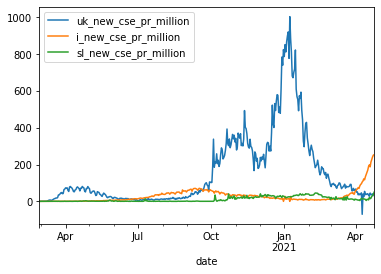

In [763]:
compare.plot(x="date", y=["uk_new_cse_pr_million", "i_new_cse_pr_million", "sl_new_cse_pr_million" ])

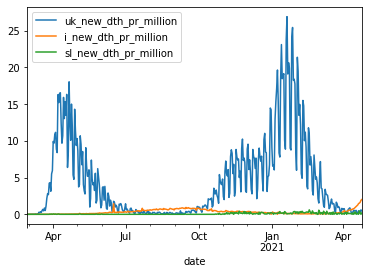

In [764]:
compare.plot(x="date", y=["uk_new_dth_pr_million", "i_new_dth_pr_million", "sl_new_dth_pr_million" ])

Check for null values

In [765]:
train.isnull().sum()

iso_code                                     0
continent                                 4057
location                                     0
date                                         0
total_cases                               1984
new_cases                                 1986
new_cases_smoothed                        2987
total_deaths                             11600
new_deaths                               11442
new_deaths_smoothed                       2987
total_cases_per_million                   2427
new_cases_per_million                     2429
new_cases_smoothed_per_million            3425
total_deaths_per_million                 12030
new_deaths_per_million                   11872
new_deaths_smoothed_per_million           3425
reproduction_rate                        16194
icu_patients                             75102
icu_patients_per_million                 75102
hosp_patients                            73288
hosp_patients_per_million                73288
weekly_icu_ad

Impute missing values

In [766]:
train = train.drop(['date'], axis=1)

In [767]:
train.dtypes[train.dtypes != 'int64'][train.dtypes != 'float64']

iso_code       object
continent      object
location       object
tests_units    object
date_num       object
dtype: object

Impute null values in categorical columns

In [768]:
train['iso_code'] = train['iso_code'].fillna('Not Listed')
train['continent'] = train['continent'].fillna('Not Listed')
train['location'] = train['location'].fillna('Not Listed')
train['tests_units'] = train['tests_units'].fillna('Not Listed')

Impute numeric columns with 0

In [769]:
train.fillna(0,inplace=True)

Ordinal encoder

In [770]:
#ordinal encoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

train.iso_code = enc.fit_transform(train.iso_code.values.reshape(-1,1))
train.continent = enc.fit_transform(train.continent.values.reshape(-1,1))
train.location = enc.fit_transform(train.location.values.reshape(-1,1))
train.tests_units = enc.fit_transform(train.tests_units.values.reshape(-1,1))

Define X and y

In [771]:
iso_code = train.iso_code

y = train[['new_deaths']]
X = train.drop(['iso_code', 'new_deaths', 'total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
                 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
                 'new_deaths_smoothed_per_million'], axis=1)

Standard Scaler

In [772]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [773]:
y

new_deaths
0             0.0
1             0.0
2             0.0
3             0.0
4             0.0
...           ...
83857         1.0
83858         1.0
83859         0.0
83860         1.0
83861         0.0

[83862 rows x 1 columns]

In [774]:
X

array([[-0.4729824 , -1.71749002, -0.15902053, ..., -0.26006898,
        -0.60113676,  0.94365743],
       [-0.4729824 , -1.71749002, -0.15904909, ..., -0.26006898,
        -0.60113676,  1.05807563],
       [-0.4729824 , -1.71749002, -0.15904909, ..., -0.26006898,
        -0.60113676,  1.17249384],
       ...,
       [-1.06939852,  1.70642526, -0.15796386, ..., -0.44880815,
        -0.36290292,  0.7171095 ],
       [-1.06939852,  1.70642526, -0.15827801, ..., -0.44880815,
        -0.36290292,  0.8315277 ],
       [-1.06939852,  1.70642526, -0.15850648, ..., -0.44880815,
        -0.36290292,  0.94594591]])

Split training file up for training and validation

In [775]:
#split train set for testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((75475, 47), (8387, 47), (75475, 1), (8387, 1))

Select model

In [776]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(max_iter=2000, random_state=1).fit(X_train, y_train)
print(model.score(X_train, y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9906934643411895


Predict on validation set

In [777]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
y_pred[y_pred < 0] = 0
print(model.score(X_val, y_val)), print(r2_score(y_pred, model.predict(X_val)))

0.8998522484622365
0.9998677126986729


(None, None)

In [778]:
y_val

new_deaths
34753       551.0
76295         0.0
19059         1.0
35954       226.0
22589         7.0
...           ...
21838        10.0
36796         1.0
37109         0.0
24357         0.0
38292         2.0

[8387 rows x 1 columns]

In [779]:
y_train.values

array([[ 0.],
       [21.],
       [ 0.],
       ...,
       [ 0.],
       [57.],
       [ 0.]])

In [780]:
y_pred

array([1061,    0,    0, ...,    0,    0,    0])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


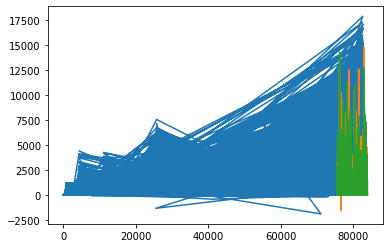

In [781]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train.values] + [x for x in y_val.values])
pyplot.plot([None for i in y_train.values] + [x for x in y_pred.astype(int)])
pyplot.show()

Put predictions in dataframe

In [782]:
df_val=pd.DataFrame({'actual_deaths': y_val.values.ravel(), 'predicted_deaths':y_pred.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

actual_deaths  predicted_deaths
0             551.0              1061
1               0.0                 0
2               1.0                 0
3             226.0               163
4               7.0                 6
...             ...               ...
8382           10.0                14
8383            1.0                 1
8384            0.0                 0
8385            0.0                 0
8386            2.0                 0

[8387 rows x 2 columns]

Create test dataset

In [783]:
test = last_date.copy()
test.date = today
test

iso_code continent  ... human_development_index  date_num
425         AFG      Asia  ...                   0.511  24042021
862    OWID_AFR       NaN  ...                     NaN  24042021
1287        ALB    Europe  ...                   0.795  24042021
1712        DZA    Africa  ...                   0.748  24042021
2131        AND    Europe  ...                   0.868  24042021
...         ...       ...  ...                     ...       ...
82218       VNM      Asia  ...                   0.704  24042021
82677  OWID_WRL       NaN  ...                   0.737  24042021
83057       YEM      Asia  ...                   0.470  24042021
83460       ZMB    Africa  ...                   0.584  24042021
83861       ZWE    Africa  ...                   0.571  24042021

[205 rows x 60 columns]

Convert date to number

In [784]:
import datetime 

test['date'] = pd.to_datetime(test['date'], errors='coerce')

test['date_num'] = test['date'].dt.strftime('%d%m%Y')
test

iso_code continent  ... human_development_index  date_num
425         AFG      Asia  ...                   0.511  25042021
862    OWID_AFR       NaN  ...                     NaN  25042021
1287        ALB    Europe  ...                   0.795  25042021
1712        DZA    Africa  ...                   0.748  25042021
2131        AND    Europe  ...                   0.868  25042021
...         ...       ...  ...                     ...       ...
82218       VNM      Asia  ...                   0.704  25042021
82677  OWID_WRL       NaN  ...                   0.737  25042021
83057       YEM      Asia  ...                   0.470  25042021
83460       ZMB    Africa  ...                   0.584  25042021
83861       ZWE    Africa  ...                   0.571  25042021

[205 rows x 60 columns]

Check for null values

In [785]:
test.isnull().sum()

iso_code                                   0
continent                                  9
location                                   0
date                                       0
total_cases                                6
new_cases                                  6
new_cases_smoothed                         6
total_deaths                              14
new_deaths                                14
new_deaths_smoothed                        6
total_cases_per_million                    7
new_cases_per_million                      7
new_cases_smoothed_per_million             7
total_deaths_per_million                  15
new_deaths_per_million                    15
new_deaths_smoothed_per_million            7
reproduction_rate                        205
icu_patients                             205
icu_patients_per_million                 205
hosp_patients                            205
hosp_patients_per_million                205
weekly_icu_admissions                    205
weekly_icu

Impute missing values

In [786]:
predict_date = test.date

test = test.drop(['date'], axis=1)

In [787]:
test.dtypes[test.dtypes != 'int64'][test.dtypes != 'float64']

iso_code       object
continent      object
location       object
tests_units    object
date_num       object
dtype: object

Impute categorical values

In [788]:
test['iso_code'] = test['iso_code'].fillna('Not Listed')
test['continent'] = test['continent'].fillna('Not Listed')
test['location'] = test['location'].fillna('Not Listed')
test['tests_units'] = test['tests_units'].fillna('Not Listed')

Impute numeric values with zero

In [789]:
test.fillna(0,inplace=True)

In [790]:
test

iso_code   continent  ... human_development_index  date_num
425         AFG        Asia  ...                   0.511  25042021
862    OWID_AFR  Not Listed  ...                   0.000  25042021
1287        ALB      Europe  ...                   0.795  25042021
1712        DZA      Africa  ...                   0.748  25042021
2131        AND      Europe  ...                   0.868  25042021
...         ...         ...  ...                     ...       ...
82218       VNM        Asia  ...                   0.704  25042021
82677  OWID_WRL  Not Listed  ...                   0.737  25042021
83057       YEM        Asia  ...                   0.470  25042021
83460       ZMB      Africa  ...                   0.584  25042021
83861       ZWE      Africa  ...                   0.571  25042021

[205 rows x 59 columns]

Ordinal encoder

In [791]:
test_country = test.location
test_country

425      Afghanistan
862           Africa
1287         Albania
1712         Algeria
2131         Andorra
            ...     
82218        Vietnam
82677          World
83057          Yemen
83460         Zambia
83861       Zimbabwe
Name: location, Length: 205, dtype: object

In [792]:
test.iso_code = enc.fit_transform(test.iso_code.values.reshape(-1,1))
test.continent = enc.fit_transform(test.continent.values.reshape(-1,1))
test.location = enc.fit_transform(test.location.values.reshape(-1,1))
test.tests_units = enc.fit_transform(test.tests_units.values.reshape(-1,1))

Define X_test

In [793]:
iso_code = test.iso_code

X_test = test.drop(['iso_code', 'total_cases', 'new_deaths','new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
                 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
                 'new_deaths_smoothed_per_million'], axis=1)

Standard scaler

In [794]:
X_test = scaler.transform(X_test)

In [795]:
X_test

array([[-0.4729824 , -1.71749002, -0.15368009, ..., -0.26006898,
        -0.60113676,  1.06036411],
       [ 1.31626595, -1.70178398,  0.13090562, ..., -3.92353018,
        -2.63009491,  1.06036411],
       [ 0.12343371, -1.68607795, -0.15507945, ...,  0.51636101,
         0.52650339,  1.06036411],
       ...,
       [-0.4729824 ,  1.45512873, -0.15764972, ..., -0.18717272,
        -0.76392988,  1.06036411],
       [-1.06939852,  1.47083476, -0.15716423, ..., -0.31318719,
        -0.31128559,  1.06036411],
       [-1.06939852,  1.48654079, -0.15850648, ..., -0.44880815,
        -0.36290292,  1.06036411]])

Predict on test set

In [796]:

prediction = model.predict(X_test)
prediction = prediction.astype(int)
prediction[prediction < 0] = 0
prediction.shape

(205,)

Put Predictions in dataframe

In [797]:
df_pred=pd.DataFrame({'country': test_country, 'predicted_date': predict_date, 'predicted_deaths':prediction.astype(int)})
df_pred.reset_index(drop=True, inplace=True)
df_pred

country predicted_date  predicted_deaths
0    Afghanistan     2021-04-25                 6
1         Africa     2021-04-25               292
2        Albania     2021-04-25                 3
3        Algeria     2021-04-25                 4
4        Andorra     2021-04-25                 0
..           ...            ...               ...
200      Vietnam     2021-04-25                 0
201        World     2021-04-25              4797
202        Yemen     2021-04-25                 2
203       Zambia     2021-04-25                 0
204     Zimbabwe     2021-04-25                 0

[205 rows x 3 columns]